In [261]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from PIL import Image
import numpy as np
from os import path
import re
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

In [262]:
data = pd.read_csv("C:\\Users\\eitan\\Documents\\completedata.csv",encoding='UTF-8')

In [263]:
names_top30 = list(top30.index)
data_top10 = data[data['company'].isin(names_top30)]
data_top10_agg = data_top10[data_top10['year'].map(len) == 4]
data_top10_agg = pd.DataFrame(data_top10_agg)
data_top10_agg['year'] = pd.to_numeric(data_top10_agg['year'])
data_top10_agg["fiver"] = (data_top10_agg["year"]//5)*5
data_top10_agg = pd.DataFrame(data_top10_agg.groupby(["company","fiver"]).size())
data_top10_agg.reset_index(inplace=True)  
data_top10_agg

company  fiver   0
0                   Admiral Corporation   1940   4
1                   Admiral Corporation   1945   1
2                   Admiral Corporation   1950  63
3    Allen B. DuMont Laboratories, Inc.   1940  19
4    Allen B. DuMont Laboratories, Inc.   1945  66
..                                  ...    ...  ..
119            Zenith Radio Corporation   1920   1
120            Zenith Radio Corporation   1925   9
121            Zenith Radio Corporation   1940  29
122            Zenith Radio Corporation   1945  85
123            Zenith Radio Corporation   1950  45

[124 rows x 3 columns]

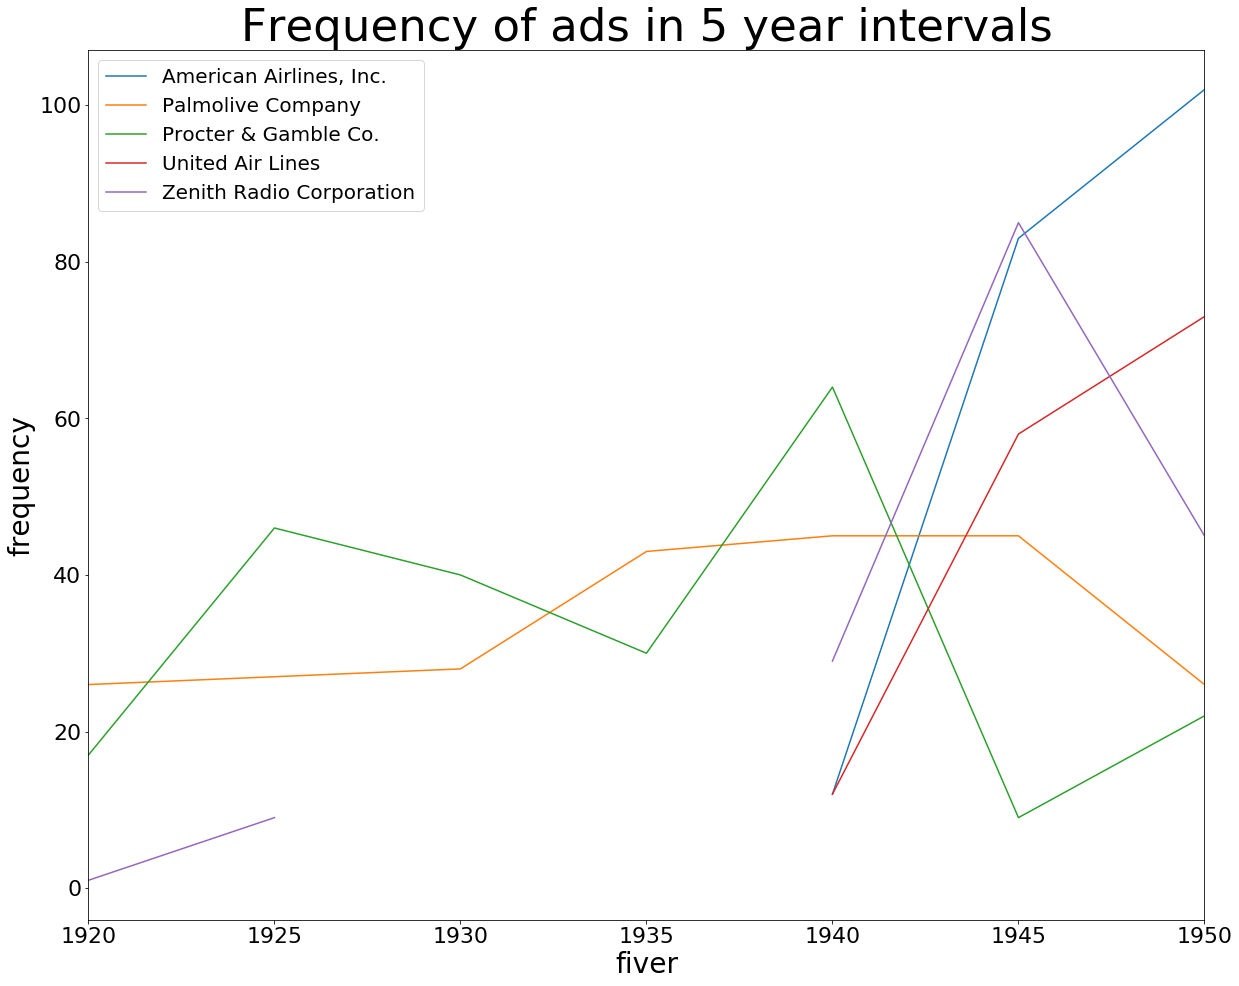

In [270]:
new_data = pd.read_csv("C:\\Users\\eitan\\Documents\\new netunim.csv",encoding='UTF-8')
company_new_freq = new_data['company'].value_counts()
top5 = pd.DataFrame(company_new_freq.head(5))
names_top5 = list(top5.index)
data_top5 = new_data[new_data['company'].isin(names_top5)]
data_top5_agg = data_top5[data_top5['year'].map(len) == 4]
data_top5_agg = pd.DataFrame(data_top5_agg)
data_top5_agg['year'] = pd.to_numeric(data_top5_agg['year'])
data_top5_agg["fiver"] = (data_top5_agg["year"]//5)*5
data_top5_agg = pd.DataFrame(data_top5_agg.groupby(["company","fiver"]).size())
data_top5_agg.reset_index(inplace=True)  
pivot_table_top5 = data_top5_agg.pivot(index='fiver',columns='company',values=0)
pivot_table_top5.plot(figsize=(20,16))
plt.tick_params(axis="x",which="major",labelsize=22)
plt.tick_params(axis="y",which="major",labelsize=22)
plt.legend(prop={"size":20})
plt.xlabel("fiver", size=28)
plt.ylabel("frequency", size=28)
plt.title("Frequency of ads in 5 year intervals",size=45)
plt.savefig('Frequency top 5 new.png')

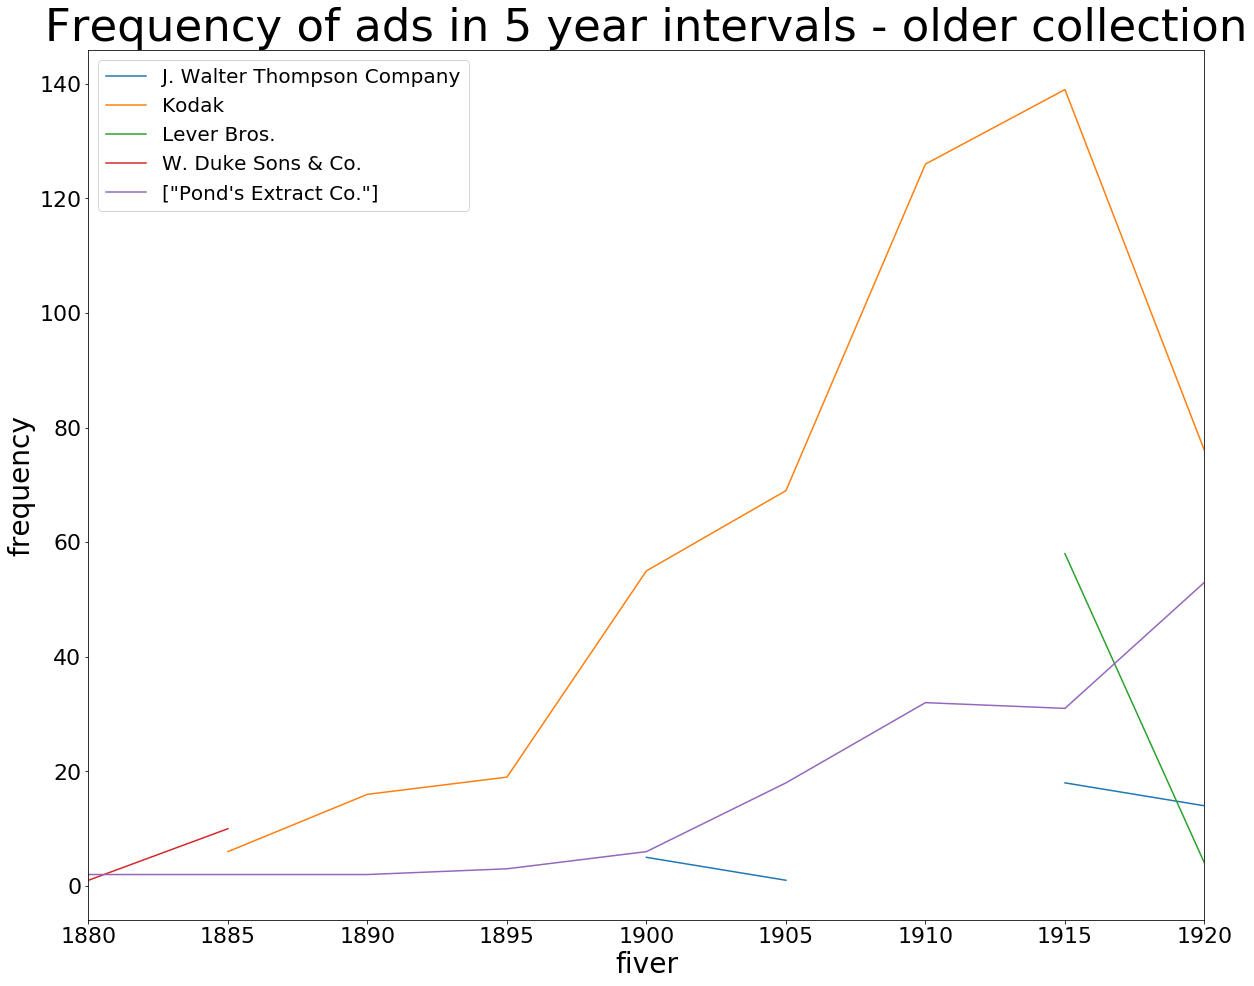

In [271]:
old_data = pd.read_csv("C:\\Users\\eitan\\Documents\\full data.csv",encoding='UTF-8')
company_old_freq = old_data['company'].value_counts()
top5 = pd.DataFrame(company_old_freq.head(5))
names_top5 = list(top5.index)
data_top5 = old_data[old_data['company'].isin(names_top5)]
data_top5_agg = data_top5[data_top5['year'].map(len) == 4]
data_top5_agg = pd.DataFrame(data_top5_agg)
data_top5_agg['year'] = pd.to_numeric(data_top5_agg['year'])
data_top5_agg["fiver"] = (data_top5_agg["year"]//5)*5
data_top5_agg = pd.DataFrame(data_top5_agg.groupby(["company","fiver"]).size())
data_top5_agg.reset_index(inplace=True)  
pivot_table_top5 = data_top5_agg.pivot(index='fiver',columns='company',values=0)
pivot_table_top5.plot(figsize=(20,16))
plt.tick_params(axis="x",which="major",labelsize=22)
plt.tick_params(axis="y",which="major",labelsize=22)
plt.legend(prop={"size":20})
plt.xlabel("fiver", size=28)
plt.ylabel("frequency",size=28)
plt.title("Frequency of ads in 5 year intervals - older collection",size=45)
plt.savefig('Frequency top 5 old.png')

Text(0.5, 1.0, 'Freuency of advertisments by company and decade')

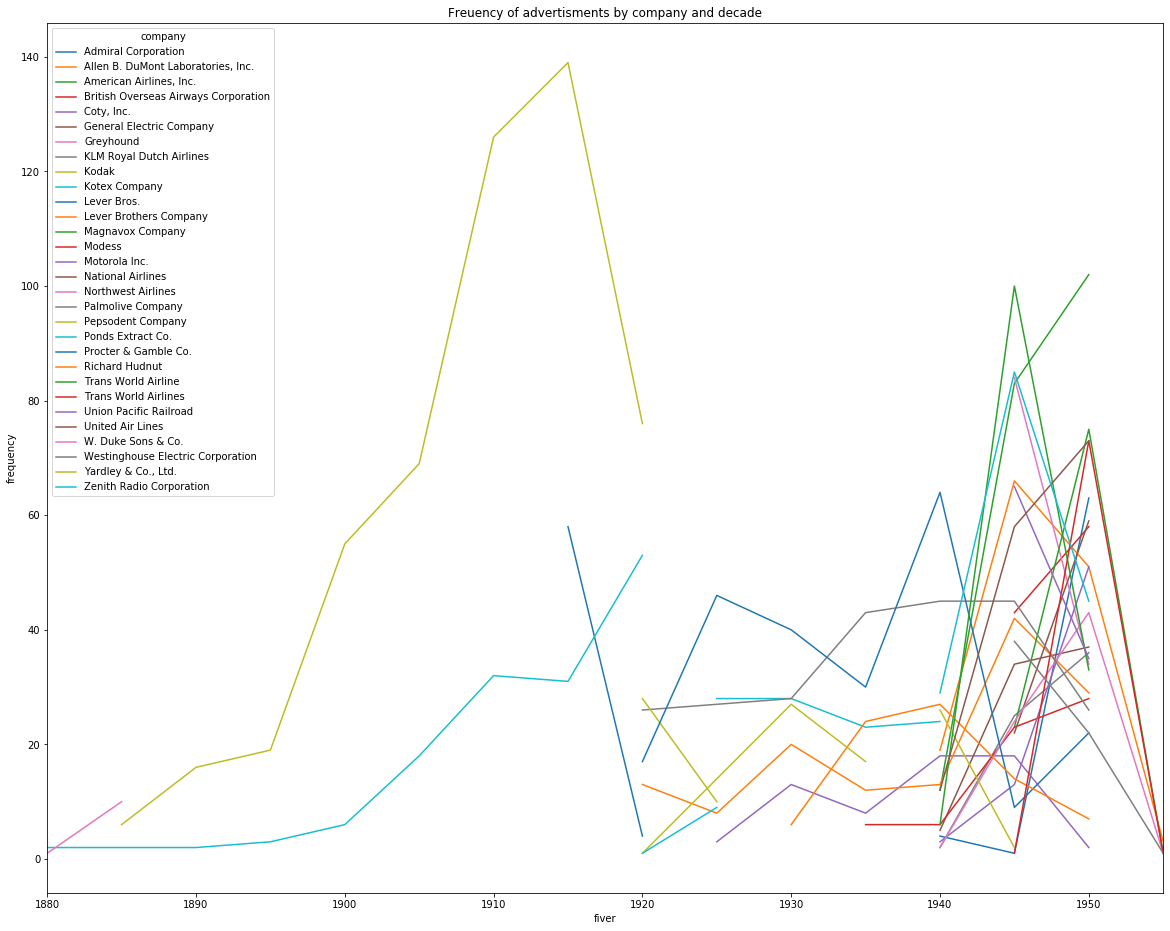

In [124]:
pivot_table_top10 = data_top10_agg.pivot(index='fiver',columns='company',values=0)
pivot_table_top10.plot(figsize=(20,16))
plt.ylabel("frequency")
plt.title("Freuency of advertisments by company and decade")
# plt.savefig('Frequency top 10.png')
# data_top30_agg
# help(pivot_table_top30.plot())

In [177]:
# data_top30_agg['year'].to_numeric(errors='ignore')
# dates = pd.date_range('1/1/2001', periods=500, freq="M")
# df = pd.DataFrame({"year": 5*np.arange(len(dates))+2}, index=dates)
# df.groupby((data_top30['year']//10)*10).sum()
# data_top30_agg.groupby((data_top30_agg['year']//10)*10).sum()
# data_top30_agg = pd.DataFrame(data_top30_agg.groupby(["company","decade"]).size())


In [218]:
#2
data2 = data
prob_categoreys = data2[data2['category'] == "R. C. Maxwell Company Collection"].index
# Delete the unknown
data2.drop(prob_categoreys, inplace=True)
words = data2[["name", "year"]]
indexNames = words[words['year'] == "unknown"].index
# Delete the unknown
words.drop(indexNames , inplace=True)
indexNames = data2[data2['year'] == "unknown"].index
data2.drop(indexNames, inplace=True)
data2

name   year  \
0                         Valuable Gang of Young Negroes   1840   
1                                          John Marshall   1842   
2      Stick To The Mail Lines!  New Mail Arrangement...   1842   
3                                               Jim Crow   1843   
4                                             Prince Hal   1843   
...                                                  ...    ...   
10399                                 Iron two feet down  1950s   
10400                    Luxury air travel to all Europe  1950s   
10401             She shall have music wherever she goes  1950s   
10402               To Paris and Such... KLM Royal Dutch  1950s   
10403                        a Spring vacation in Europe  1950s   

                                                headline  \
0                         Valuable Gang of Young Negroes   
1                                          John Marshall   
2      Stick To The Mail Lines!  New Mail Arrangement...   
3                                               Jim Crow   
4                                             Prince Hal   
...                                                  ...   
10399                                 Iron two feet down   
10400                    Luxury air travel to all Europe   
10401             She shall have music wherever she goes   
10402               To Paris and Such... KLM Royal Dutch   
10403                        a Spring vacation in Europe   

                        company                 product  \
0                 Jos. A. Beard                     NaN   
1            A. McKenzie Stable                     NaN   
2                   U.S. Mail ?                     NaN   
3             Henry Watson Farm                     NaN   
4             Henry Watson Farm                     NaN   
...                         ...                     ...   
10399    Trans-Canada Air Lines  Trans-Canada Air Lines   
10400   Sabena Belgian Airlines                  Europe   
10401               Arvin Radio         Portable radios   
10402  KLM Royal Dutch Airlines                   Paris   
10403   Sabena Belgian Airlines                  Europe   

                         category  \
0           Broadsides Collection   
1           Broadsides Collection   
2           Broadsides Collection   
3           Broadsides Collection   
4           Broadsides Collection   
...                           ...   
10399  Transportation (1938-1957)   
10400  Transportation (1938-1957)   
10401           Radio (1922-1956)   
10402  Transportation (1938-1957)   
10403  Transportation (1938-1957)   

                                           subject            publication  \
0                                           Slaves                    NaN   
1                                 Animals and Stud                    NaN   
2                          Transportation & Travel                    NaN   
3                                 Animals and Stud                    NaN   
4                                 Animals and Stud                    NaN   
...                                            ...                    ...   
10399            Transportation & Travel, Airlines                    NaN   
10400            Transportation & Travel, Airlines    National Geographic   
10401                           Radio, Arvin Radio  Saturday Evening Post   
10402            Transportation & Travel, Airlines             New Yorker   
10403  Children, Transportation & Travel, Airlines    National Geographic   

                        medium                                    format  \
0                          NaN                            advertisements   
1                          NaN                            advertisements   
2                          NaN  advertisements, black-and-white drawings   
3                          NaN                            advertisements   
4                          NaN                            advertise

In [219]:
words['year'] = words['year'].str.split('s').str[0]
words['year'] = words['year'].str.split('circa').str[0]
words['year'] = words['year'].str.split('-').str[0]
words['year'] = words['year'].str.split('to').str[0]
words['year'] = words['year'].str.split('?').str[0]
words['year'] = words['year'].str.split('year').str[0]
words['year'] = pd.to_numeric(words['year'])


C:\Users\eitan\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\eitan\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\eitan\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

In [220]:
print(type(words['year'][0]))
# indexNames = words[words['year'] == 1861.0].index
# words_1 = words.drop(indexNames , inplace=True)
df = words
df1 = df[(df['year'] >= 1840) & (df['year'] <= 1860)]
df2 = df[(df['year'] >= 1861) & (df['year'] <= 1865)]
df3 = df[(df['year'] >= 1866) & (df['year'] <= 1875)]
df4 = df[(df['year'] >= 1876) & (df['year'] <= 1885)]
df5 = df[(df['year'] >= 1886) & (df['year'] <= 1895)]
df6 = df[(df['year'] >= 1896) & (df['year'] <= 1905)]
df7 = df[(df['year'] >= 1906) & (df['year'] <= 1913)]
df8 = df[(df['year'] >= 1914) & (df['year'] <= 1918)]
df9 = df[(df['year'] >= 1919) & (df['year'] <= 1928)]
df10 = df[(df['year'] >= 1929) & (df['year'] <= 1933)]
df11 = df[(df['year'] >= 1934) & (df['year'] <= 1938)]
df12 = df[(df['year'] >= 1939) & (df['year'] <= 1945)]
df13 = df[(df['year'] >= 1946) & (df['year'] <= 1950)]
df14 = df[(df['year'] >= 1951) & (df['year'] <= 1960)]
df1
#האם לפצל את 46 עד 57 מכיוון שמדובר בשליש מהפרסומות?

<class 'numpy.float64'>


name    year
0                       Valuable Gang of Young Negroes  1840.0
1                                        John Marshall  1842.0
2    Stick To The Mail Lines!  New Mail Arrangement...  1842.0
3                                             Jim Crow  1843.0
4                                           Prince Hal  1843.0
..                                                 ...     ...
90                                     Portable fences  1860.0
91                       Presidential Campaign of 1860  1860.0
92                       Spencer House Breakfast Card.  1860.0
93   The National Political Chart, and Map of the U...  1860.0
152                         The Southern Marseillaise.  1860.0

[93 rows x 2 columns]

In [134]:
def make_df(list_token):
    df = pd.DataFrame(columns=['value','num'],index=[0])
    i=0
    for string in [ele for ind, ele in enumerate(list_token,1) if ele not in list_token[ind:]]:
        df.loc[i]=[string,list_token.count(string)]
        i=i+1
    df=df.sort_values('num',ascending=False)
    df["x"]=np.arange(len(df))+1
    return df

def converter(col):    
    word_list1 = col.tolist()
    word_list1 = [str(i) for i in word_list1]
    word_string1=' '.join(word_list1)
    word_string1 = re.sub('[?!@.,“/#$$''”""`’&‘׳:1234567890;]', '', word_string1)
    word_string1 = word_string1.lower()
    token_words1 = word_tokenize(word_string1)
    stop_words = set(stopwords.words('english')) 
    filtered_words1 = [] 
    for w in token_words1: 
        if w not in stop_words: 
            filtered_words1.append(w)
    filtered_word_string1=' '.join(filtered_words1)
    freq1 = make_df(filtered_words1)
    top5 = freq1.head(5)
#     top5["year range"] 
    return(filtered_word_string1,top5)


In [135]:
# filtered_word_string1,top5_1 = converter(df1["name"])
#filtered_word_string2,top5_2 = converter(df2["name"])
#filtered_word_string3,top5_3 = converter(df3["name"])
# filtered_word_string4,top5_4 = converter(df4["name"])
# filtered_word_string5,top5_5 = converter(df5["name"])
# filtered_word_string6,top5_6 = converter(df6["name"])
# filtered_word_string7,top5_7 = converter(df7["name"])
# filtered_word_string8,top5_8 = converter(df8["name"])
# filtered_word_string9,top5_9 = converter(df9["name"])
# filtered_word_string10,top5_10 = converter(df10["name"])
# filtered_word_string11,top5_11 = converter(df11["name"])
filtered_word_string12,top5_12 = converter(df12["name"])
# filtered_word_string13,top5_13 = converter(df13["name"])
# filtered_word_string14,top5_14 = converter(df14["name"])
filtered_word_string12

'hey mum new improved palmolive milder skin dare give scalp fingernail test said ill tell world women get lovely locket latest rage new sweetheart- perfume locket cents sweetheart soap wrappers scalp stand fingernail test c soap sale things desire one exciting new shampoo picture loveliness sun andrea radio sharp focus television sight sound receivers false teeth false friends bloomingdales first present andrea television kits bouquet lentheric daytime fragrance complexion secrets countess confessions private secretary dame margaret renews youth design glamour remember born stained plates shout- false teeth breath broadcast wear false teeth dont give athletics day month echoes paris encores emeraude fibs kotex tampon quilted false teeth wearers often worst breath offenders frances denney introduces under-tone dry skin get medium-size bottle amazing new halo shampoo free gets grit grime time glamorous art model triumphs glamour dark gorgeous hair lovely hands woman conquers dont let dul

In [136]:
df1

name    year
0                       Valuable Gang of Young Negroes  1840.0
1                                        John Marshall  1842.0
2    Stick To The Mail Lines!  New Mail Arrangement...  1842.0
3                                             Jim Crow  1843.0
4                                           Prince Hal  1843.0
..                                                 ...     ...
90                                     Portable fences  1860.0
91                       Presidential Campaign of 1860  1860.0
92                       Spencer House Breakfast Card.  1860.0
93   The National Political Chart, and Map of the U...  1860.0
152                         The Southern Marseillaise.  1860.0

[93 rows x 2 columns]

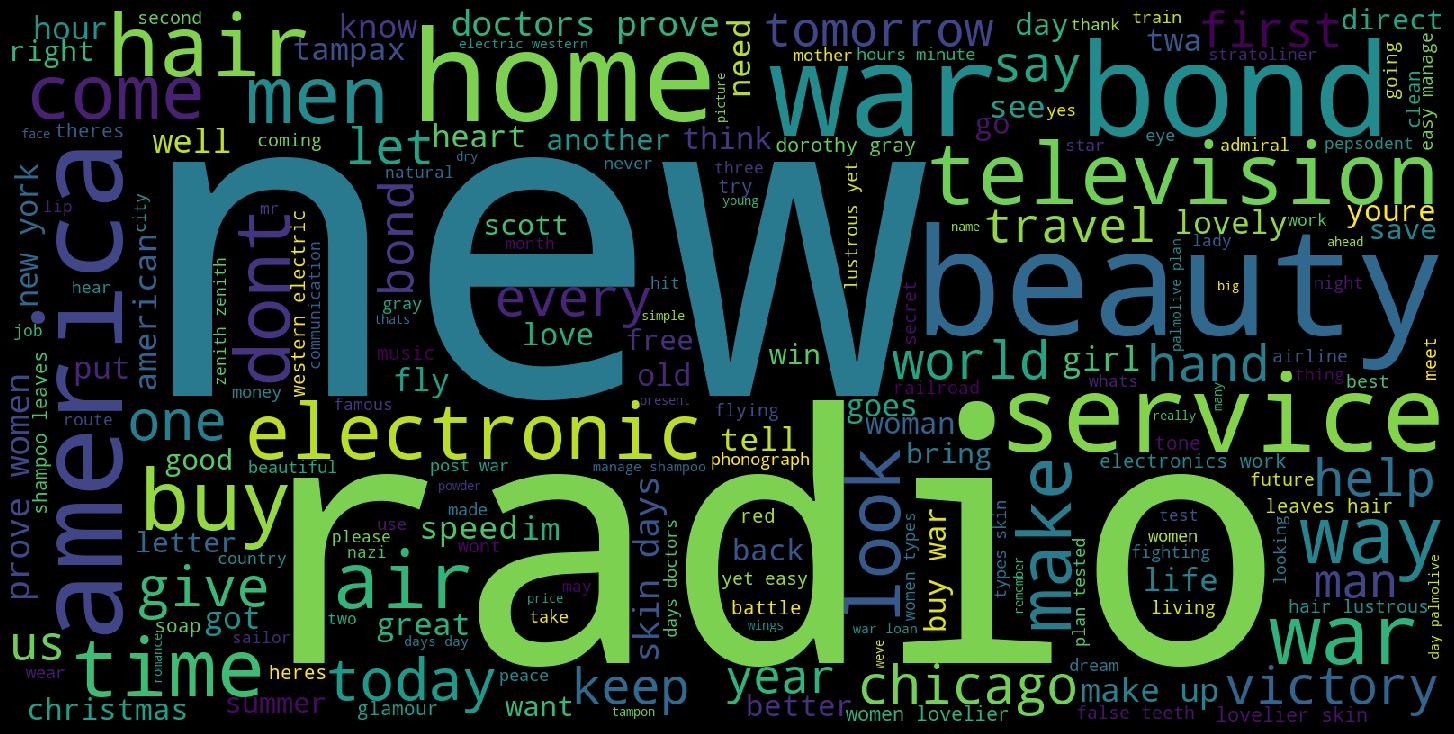

In [137]:
wordcloud = WordCloud(width=1600, height=800).generate(filtered_word_string12)
plt.figure( figsize=(20,10), facecolor='k')
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
# plt.savefig('project word cloud12.png')
plt.show()

In [138]:
def converter_sub(col):
    sub_list1 = col.tolist()
    sub_list1=' '.join(sub_list1)
    sub_s = re.sub('[?!@.,“/#$$''”""&`’‘׳:;9012345678]', '', sub_list1)
    x = sub_s.split()
    word_string1=' '.join(x)
    tokens_sub = word_tokenize(word_string1)
    stop_words = set(stopwords.words('english')) 
    filtered_subjects = [] 
    for w in tokens_sub: 
        if w != "NaN":
            if w != "dtype":
                if w not in stop_words: 
                    filtered_subjects.append(w)
    filtered_subjects_for_cloud=' '.join(filtered_subjects)
    freq_sub = make_df(filtered_subjects)
    top5s = freq_sub.head(5)
    return(filtered_subjects_for_cloud,top5s)

In [139]:

data2['year'] = data2['year'].str.split('s').str[0]
data2['year'] = data2['year'].str.split('circa').str[0]
data2['year'] = data2['year'].str.split('-').str[0]
data2['year'] = data2['year'].str.split('to').str[0]
data2['year'] = data2['year'].str.split('?').str[0]
data2['year'] = data2['year'].str.split('year').str[0]
data2['year'] = pd.to_numeric(data2['year'])

In [140]:
subjects1 = data2[(data2['year'] >= 1840) & (data2['year'] <= 1860)]
subjects2 = data2[(data2['year'] >= 1861) & (data2['year'] <= 1865)]
subjects3 = data2[(data2['year'] >= 1866) & (data2['year'] <= 1875)]
subjects4 = data2[(data2['year'] >= 1876) & (data2['year'] <= 1885)]
subjects5 = data2[(data2['year'] >= 1886) & (data2['year'] <= 1895)]
subjects6 = data2[(data2['year'] >= 1896) & (data2['year'] <= 1905)]
subjects7 = data2[(data2['year'] >= 1906) & (data2['year'] <= 1913)]
subjects8 = data2[(data2['year'] >= 1914) & (data2['year'] <= 1918)]
subjects9 = data2[(data2['year'] >= 1919) & (data2['year'] <= 1928)]
subjects10 = data2[(data2['year'] >= 1929) & (data2['year'] <= 1933)]
subjects11 = data2[(data2['year'] >= 1934) & (data2['year'] <= 1938)]
subjects12 = data2[(data2['year'] >= 1939) & (data2['year'] <= 1945)]
subjects13 = data2[(data2['year'] >= 1946) & (data2['year'] <= 1950)]
subjects14 = data2[(data2['year'] >= 1951) & (data2['year'] <= 1957)]
subjects4

name    year  \
235                           Acker, Merrall & Condit.  1876.0   
236                             Cheyenne State Lottery  1876.0   
237                                   Court House Hall  1876.0   
238                     December Bulletin Of New Music  1876.0   
239  Descriptive Pamphlet of the Baltimore Pearl Ho...  1876.0   
..                                                 ...     ...   
477                             Dukes Cameo Cigarettes  1880.0   
478                       Postage Stamps - Loose Cards  1880.0   
479            Practical, Useful, Profitable Education  1880.0   
480  Schedule of Lumber and Posts Bought By Gernert...  1880.0   
481                           Sweet Caporal Cigarettes  1880.0   

                                              headline  \
235                           Acker, Merrall & Condit.   
236                             Cheyenne State Lottery   
237                                   Court House Hall   
238                     December Bulletin Of New Music   
239  Descriptive Pamphlet of the Baltimore Pearl Ho...   
..                                                 ...   
477                                                NaN   
478                                                NaN   
479            Practical, Useful, Profitable Education   
480  Schedule of Lumber and Posts Bought By Gernert...   
481                                                NaN   

                        company                   product  \
235     Acker, Merrall & Condit                       NaN   
236      Cheyenne State Lottery                       NaN   
237                     unknown                       NaN   
238                Ditson & Co.                       NaN   
239  Baltimore Pearl Hominy Co.       Buckeye Hominy Mill   
..                          ...                       ...   
477          W. Duke Sons & Co.    Dukes Cameo Cigarettes   
478          W. Duke Sons & Co.          Dukes Cigarettes   
479    Eastman Business College  Eastman Business College   
480     Gernert Bros. & Koehler                       NaN   
481                Kinney Bros.  Sweet Caporal Cigarettes   

                            category                       subject  \
235            Broadsides Collection           Price List, Alcohol   
236            Broadsides Collection           Price List, Lottery   
237            Broadsides Collection     Price List, Entertainment   
238            Broadsides Collection  Price List, Music and Pianos   
239  Advertising Ephemera Collection    Price List, Farm Machinery   
..                               ...                           ...   
477              Tobacco Advertising              Packaging, Misc.   
478              Tobacco Advertising      Nations, Asian, European   
479  Advertising Ephemera Collection                     Education   
480            Broadsides Collection           Lumber and Building   
481              Tobacco Advertising              Packaging, Misc.   

    publication medium                                    format  \
235         NaN    NaN                            advertisements   
236         NaN    NaN                            advertisements   
237         NaN    NaN                            advertisements   
238         NaN    NaN                            advertisements   
239         NaN    NaN       advertisements, engravings (prints)   
..          ...    ...                                       ...   
477         NaN    NaN            advertisements, color drawings   
478         NaN    NaN            advertisements, color drawings   
479         NaN    NaN       advertisements, engravings (prints)   
480         NaN    NaN  advertisements, black-and-white drawings   
481         NaN    NaN            advertisements, color drawings   

                                          link  \
235  https://idn.duke.edu/ark:/87924/r4tm73r6c   
236  https://idn.duke.edu/ark:/87924/r4x63cw8q   
237  https://idn.du

In [141]:
# filtered_subject_string1,top5_1s = converter_sub(subjects1["subject"])
# filtered_subject_string2,top5_2s = converter_sub(subjects2["subject"])
# filtered_subject_string3,top5_3s = converter_sub(subjects3["subject"])
# filtered_subject_string4,top5_4s = converter_sub(subjects4["subject"])
# filtered_subject_string5,top5_5s = converter_sub(subjects5["subject"])
# filtered_subject_string6,top5_6s = converter_sub(subjects6["subject"])
# filtered_subject_string7,top5_7s = converter_sub(subjects7["subject"])
# filtered_subject_string8,top5_8s = converter_sub(subjects8["subject"])
# filtered_subject_string9,top5_9s = converter_sub(subjects9["subject"])
# filtered_subject_string10,top5_10s = converter_sub(subjects10["subject"])
# filtered_subject_string11,top5_11s = converter_sub(subjects11["subject"])
filtered_subject_string12,top5_12s = converter_sub(subjects12["subject"])
# filtered_subject_string13,top5_13s = converter_sub(subjects13["subject"])
# filtered_subject_string14,top5_14s = converter_sub(subjects14["subject"])
filtered_subject_string12

'Children Country Publication Canada Famous People Soaps Dr Allan Roy Dafoe The Dionne Quintuplets Premiums Hair Preparations Premiums Feminine Hygiene Coupons Soaps Hair Preparations Soaps Hair Preparations Cosmetics Television Andrea Dental Supplies Retail Television Bloomingdales Cosmetics Cosmetics Feminine Hygiene Cosmetics Cosmetics Children Famous People Soaps Dionne Quins Dental Supplies Dental Supplies Premiums Sports Feminine Hygiene Cosmetics Cosmetics Premiums Feminine Hygiene Dental Supplies Cosmetics Coupons Hair Preparations Soaps Testimonial Hair Preparations Miss Alice Anderson model Cosmetics Premiums Hair Preparations Cosmetics Illustration Comics Soaps Retail Cosmetics Hudnut Salon Testimonial Hair Preparations Miss Margaret McConnell actress Feminine Hygiene Hair Preparations Cosmetics Cosmetics Cosmetics Cosmetics Cosmetics Cosmetics Illustration Comics Soaps Famous People Illustration Comics Soaps Dionne Quins Illustration Comics Soaps Illustration Comics Soaps S

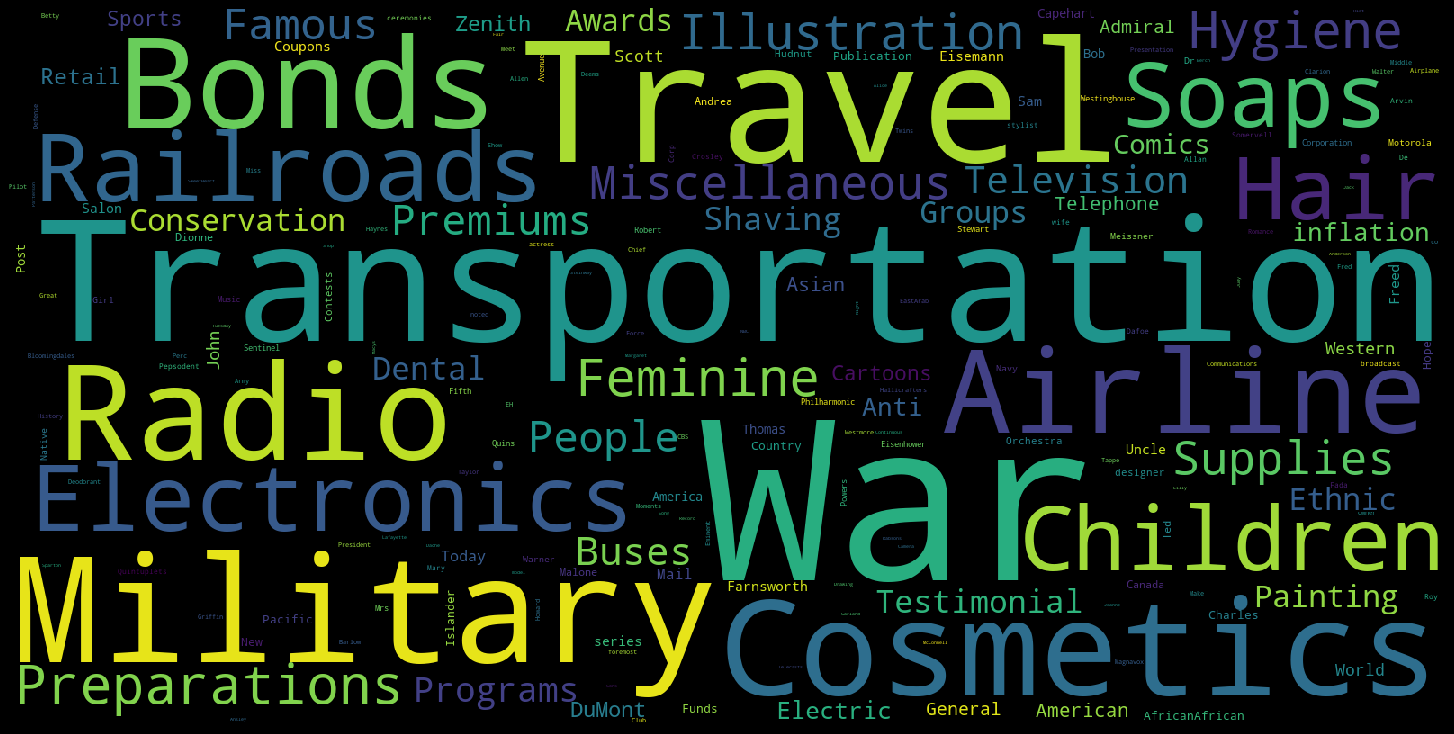

In [142]:
wordcloud = WordCloud(width=1600, height=800,collocations = False).generate(filtered_subject_string12)
plt.figure( figsize=(20,10), facecolor='k')
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
# plt.savefig('project subject cloud12.png')
plt.show()

old_data

In [143]:
old_data

name  \
0                        Valuable Gang of Young Negroes   
1                                         John Marshall   
2     Stick To The Mail Lines!  New Mail Arrangement...   
3                                              Jim Crow   
4                                            Prince Hal   
...                                                 ...   
3181                        Annie Grace Clark Scrapbook   
3182                                 De Votie Scrapbook   
3183                       Emma Saxton Pascoe Scrapbook   
3184                                   Hawley Scrapbook   
3185          Making Advertisements and Making Them Pay   

                                               headline  year product  \
0                        Valuable Gang of Young Negroes  1840     NaN   
1                                         John Marshall  1842     NaN   
2     Stick To The Mail Lines!  New Mail Arrangement...  1842     NaN   
3                                              Jim Crow  1843     NaN   
4                                            Prince Hal  1843     NaN   
...                                                 ...   ...     ...   
3181                                                NaN   NaN     NaN   
3182                                                NaN   NaN     NaN   
3183                                                NaN   NaN     NaN   
3184                                                NaN   NaN     NaN   
3185                                                NaN   NaN     NaN   

                            category  \
0              Broadsides Collection   
1              Broadsides Collection   
2              Broadsides Collection   
3              Broadsides Collection   
4              Broadsides Collection   
...                              ...   
3181                      Scrapbooks   
3182                      Scrapbooks   
3183                      Scrapbooks   
3184                      Scrapbooks   
3185  Early Advertising Publications   

                                                subject publication medium  \
0                                                Slaves         NaN    NaN   
1                                      Animals and Stud         NaN    NaN   
2                               Transportation & Travel         NaN    NaN   
3                                      Animals and Stud         NaN    NaN   
4                                      Animals and Stud         NaN    NaN   
...                                                 ...         ...    ...   
3181  Animals', 'Children', 'Food', 'Tobacco', 'Flow...         NaN    NaN   
3182  Entertainment', 'Calling Cards', 'Business Car...         NaN    NaN   
3183  Women', 'Animals', 'Children', 'Food', 'Greeti...         NaN    NaN   
3184  Animals', 'Children', 'Food', 'Tobacco', 'Flow...         NaN    NaN   
3185                                                NaN         NaN    NaN   

                                          format  \
0                                 advertisements   
1                                 advertisements   
2     advertisements', 'black-and-white drawings   
3                                 advertisements   
4                                 advertisements   
...                                          ...   
3181                                  scrapbooks   
3182                                  scrapbooks   
3183                                  scrapbooks   
3184                                  scrapbooks   
3185                              advertisements   

                                           link  \
0     https://idn.duke.edu/ark:/87924/r4j67bk8c   
1     https://idn.duke.edu/ark:/87924/r4pv6cx38   
2     https://idn.duke.edu/ark:/87924/r40z72p9h   
3     https://idn.duke.edu/ark:/87924/r4610xf3q   
4     https://idn.duke.edu/ark:/87924/r40z72k4r   
...                                         ...   
3181  https://idn.duke.edu/ark:/87924/r42f7md4k   
3182  https://

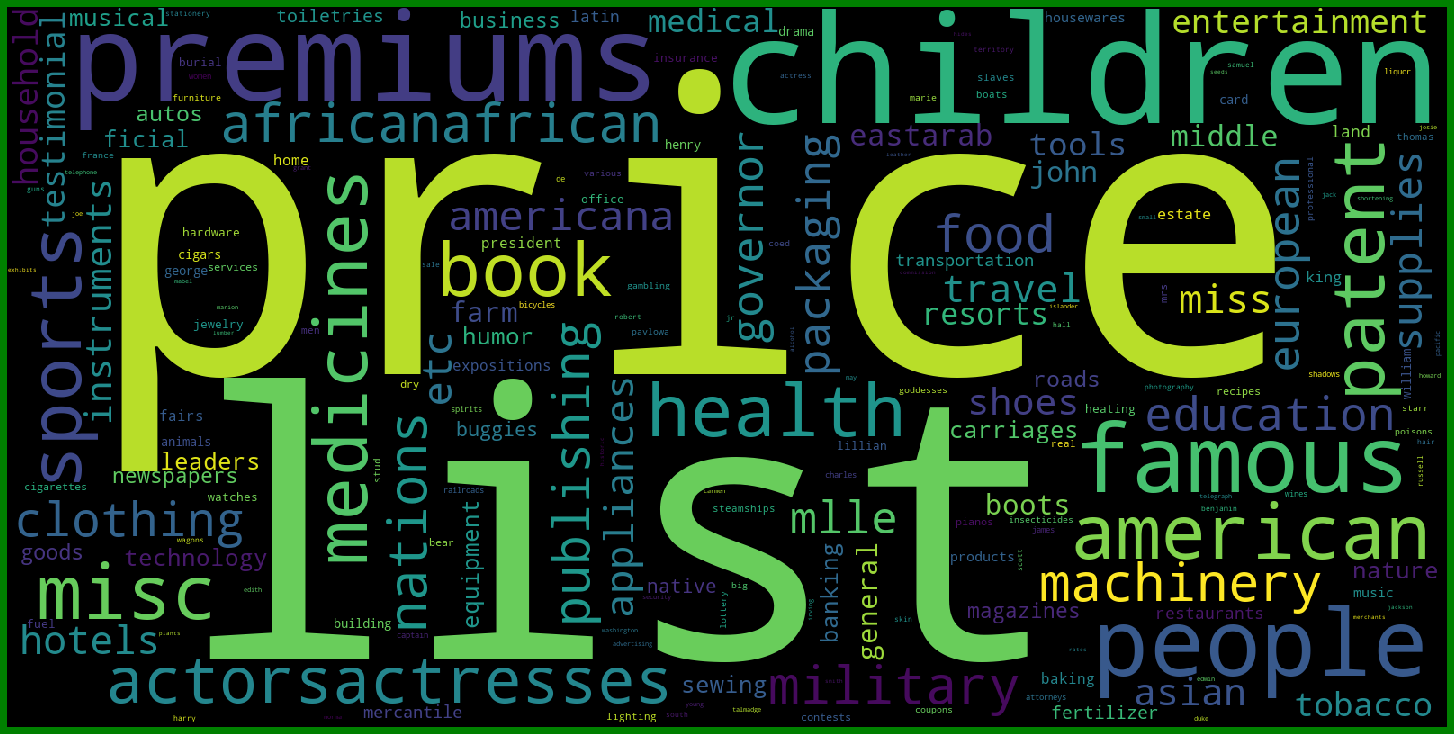

In [225]:
#comparing data

full_old,top5_old = converter(old_data["subject"])
full_old =  full_old.replace("nan", "")
full_old = str(full_old)
full_old = full_old.replace("\n","")
full_old = re.sub(r'[\W_]+', ' ', full_old)

wordcloud = WordCloud(width=1600, height=800,collocations = False).generate(full_old)
plt.figure( figsize=(20,10), facecolor='g')
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
# plt.savefig('old data subjects.png')
plt.show()


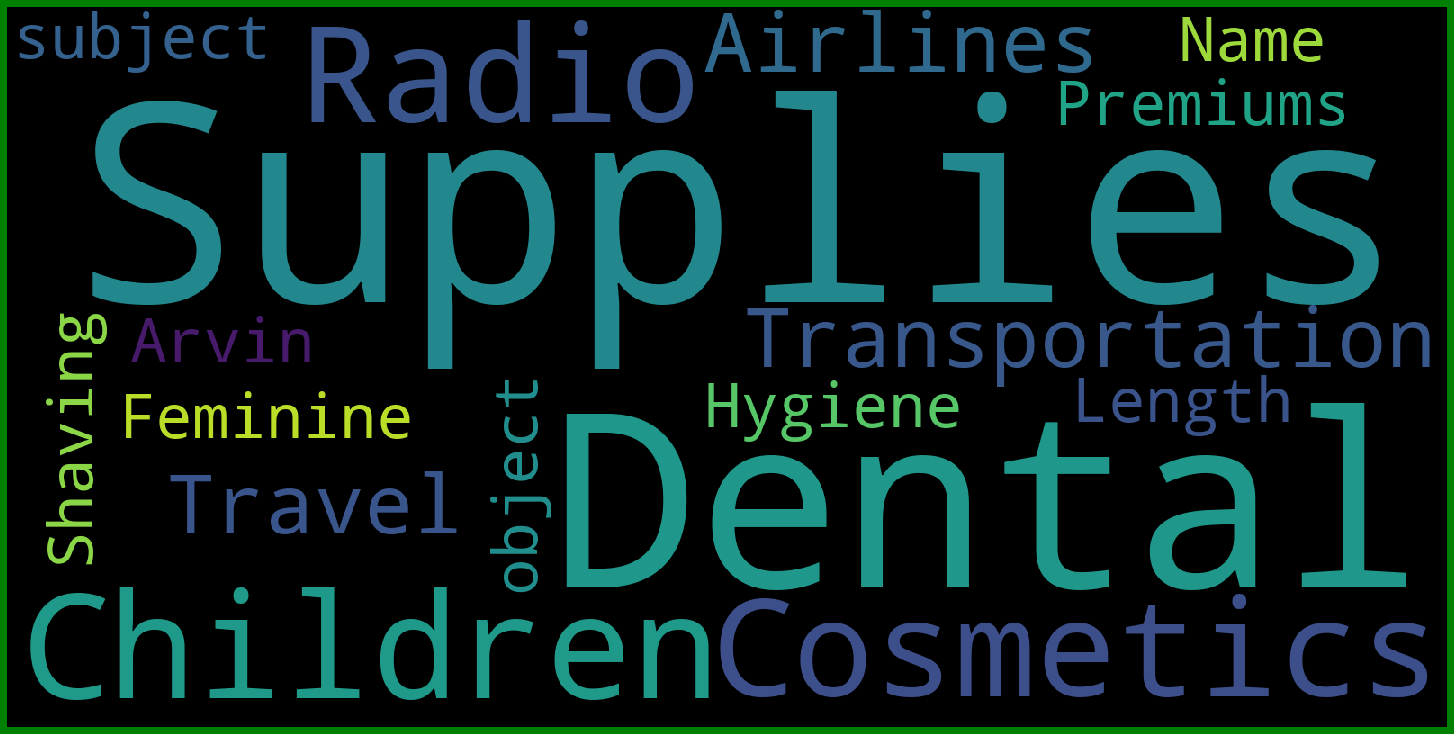

In [11]:
#new_data
full_new,top5_new = converter(new_data["subject"])
wordcloud = WordCloud(width=1600, height=800).generate(full_new)
plt.figure( figsize=(20,10), facecolor='g')
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
# plt.savefig('new data subjects.png')
plt.show()


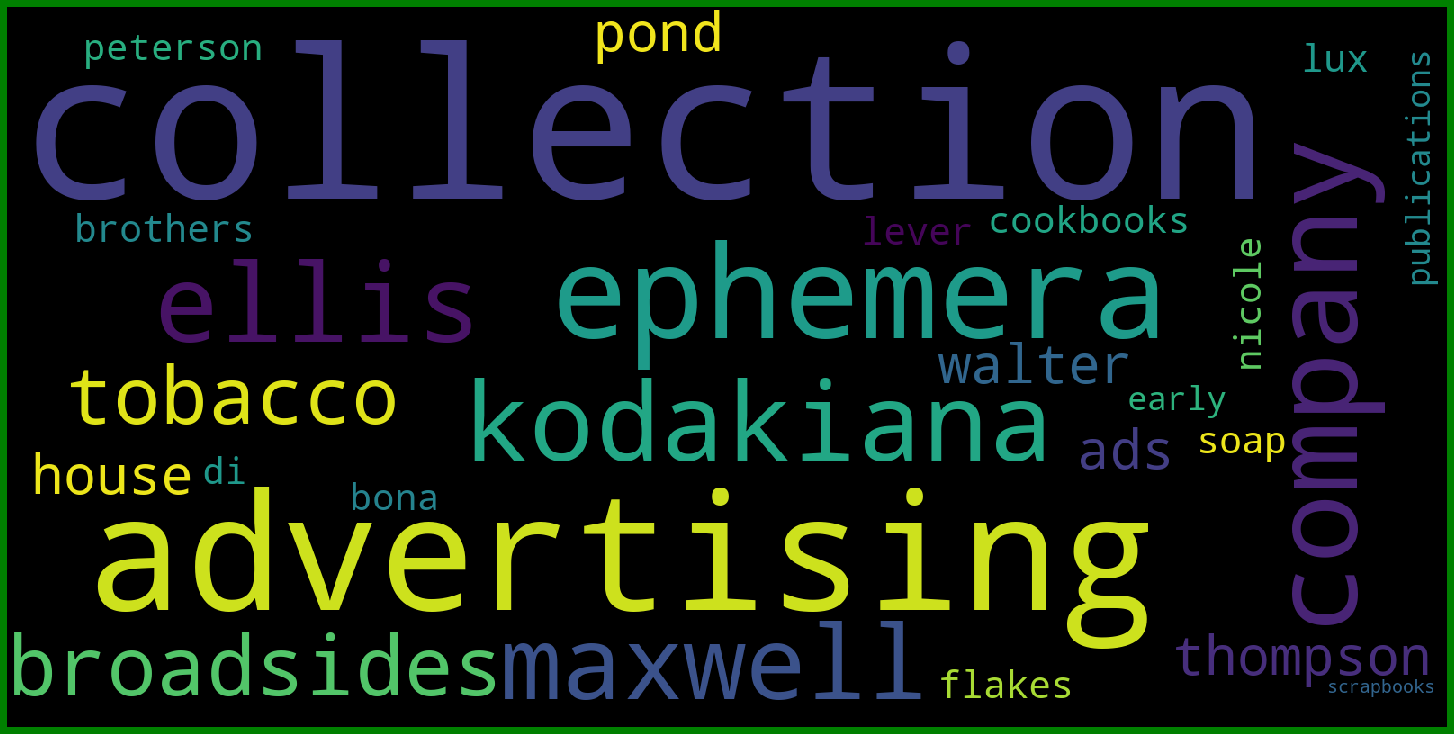

In [146]:
full_old_cat,top5_old_cat = converter(old_data["category"])
wordcloud = WordCloud(width=1600, height=800,collocations = False).generate(full_old_cat)
plt.figure( figsize=(20,10), facecolor='g')
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
# plt.savefig('old data categoreys.png')
plt.show()


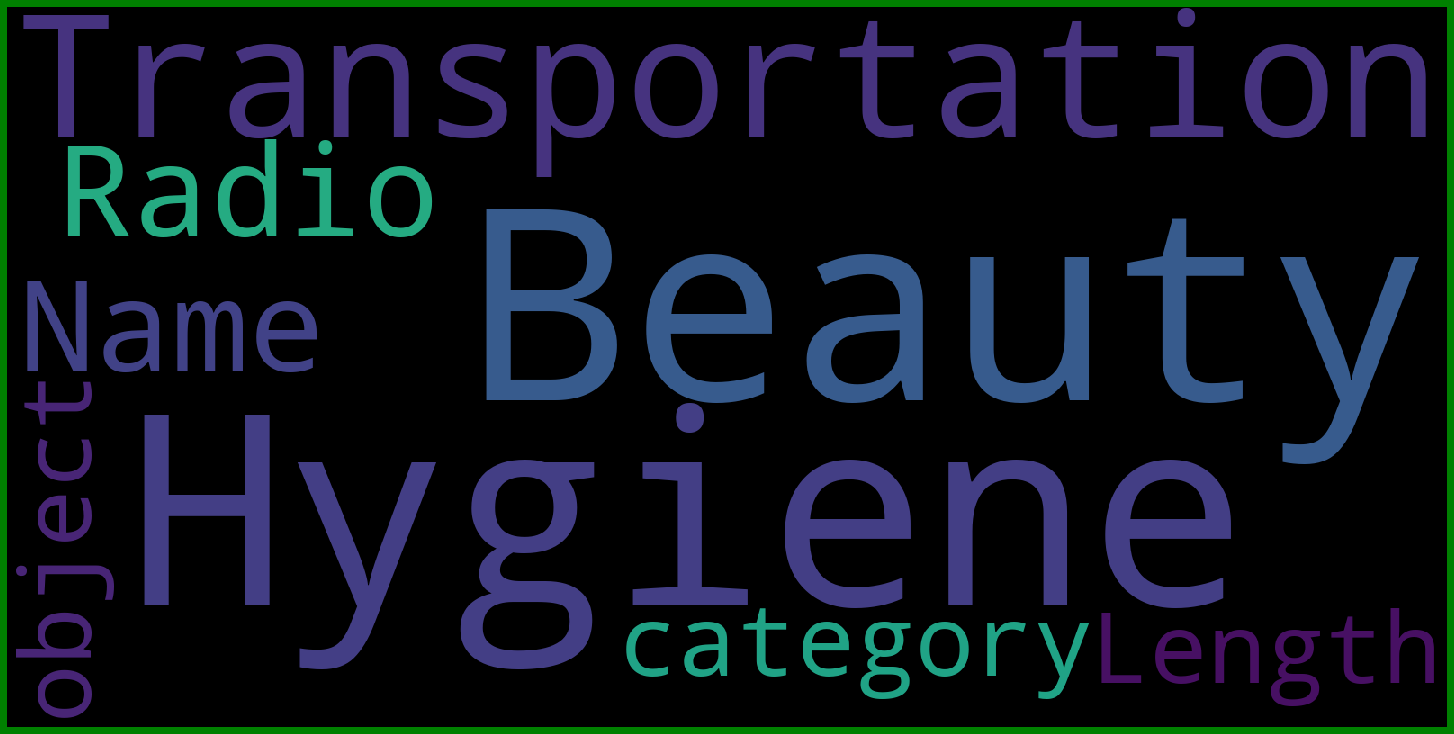

In [14]:
full_new_cat,top5_old_cat = converter(new_data["category"])
wordcloud = WordCloud(width=1600, height=800).generate(full_new_cat)
plt.figure( figsize=(20,10), facecolor='g')
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
# plt.savefig('new data categoreys.png')
plt.show()

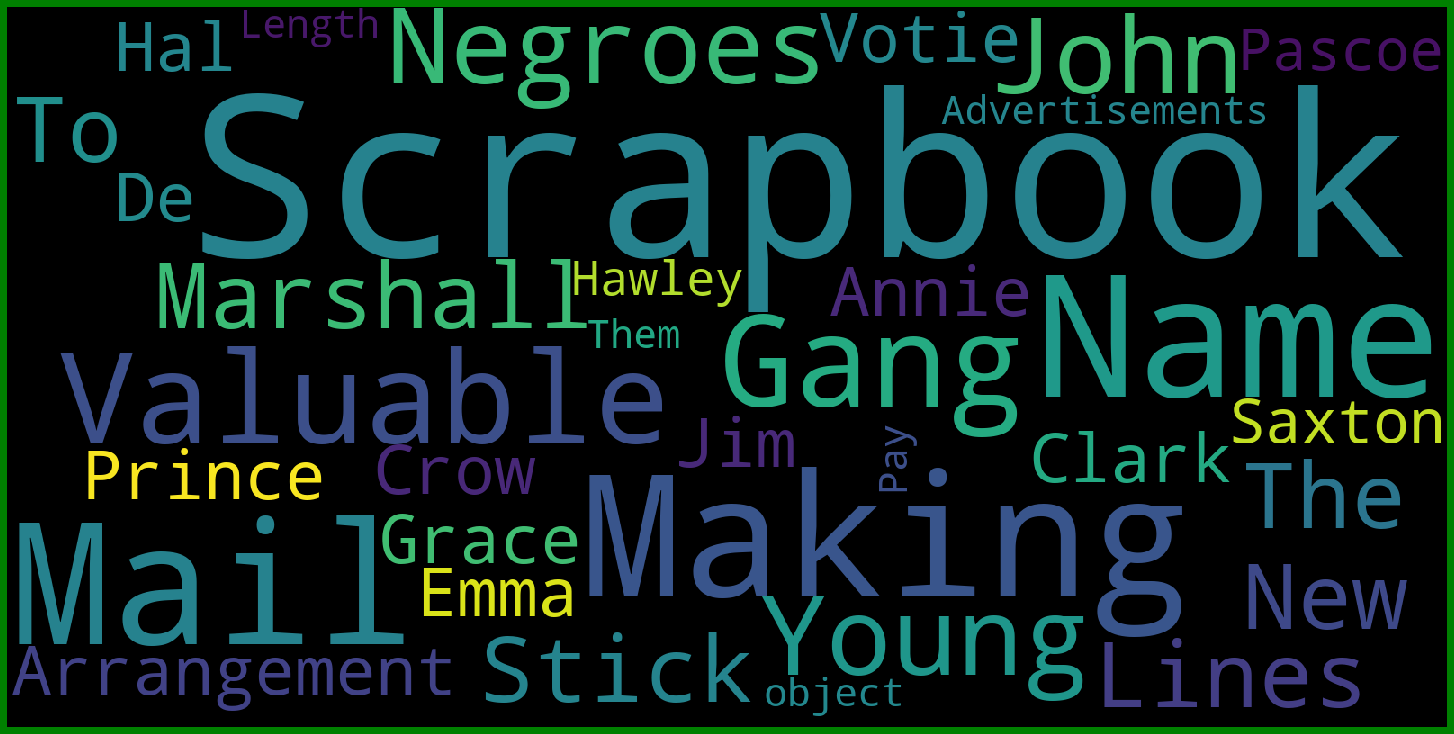

In [12]:
#words in old data
word_old,top5_title_old = converter(old_data["name"])
wordcloud = WordCloud(width=1600, height=800).generate(word_old)
plt.figure( figsize=(20,10), facecolor='g')
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
# plt.savefig('old data names.png')
plt.show()

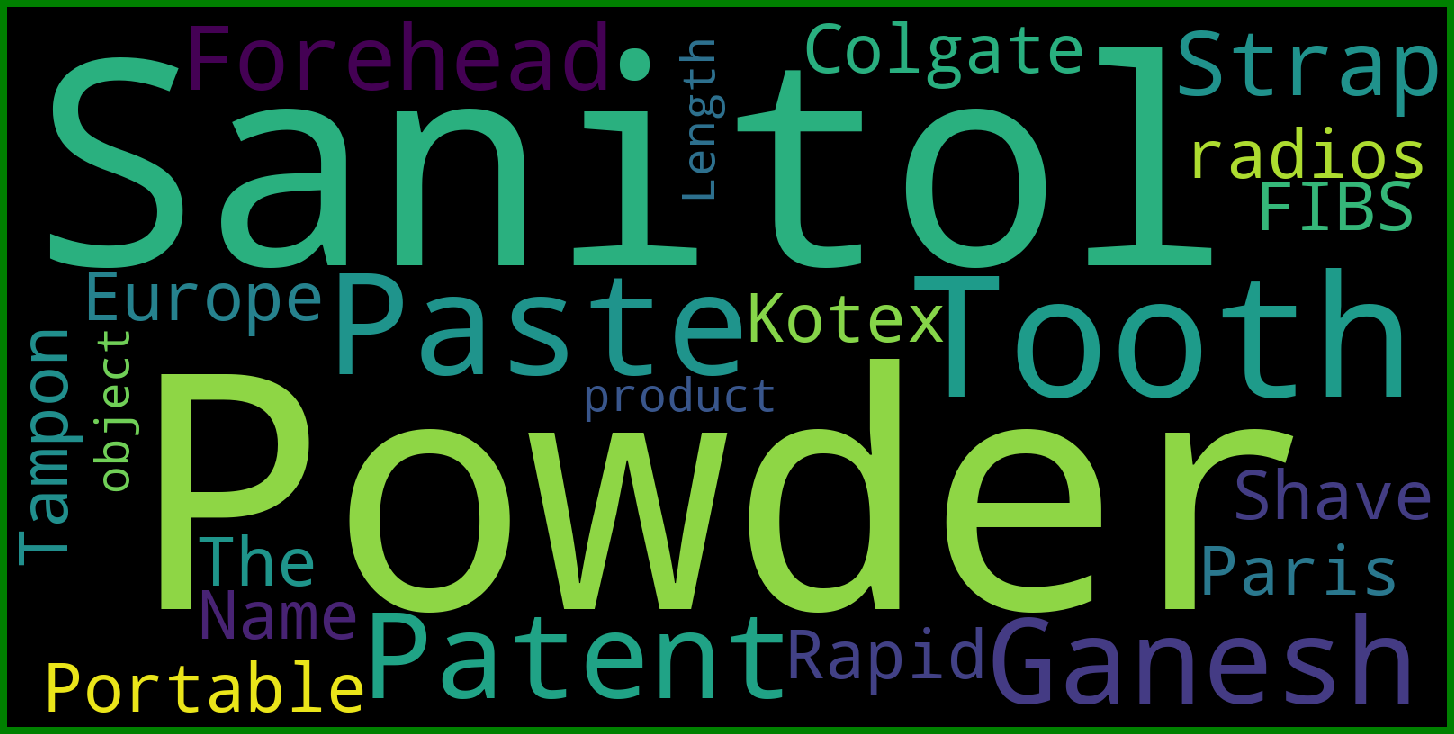

In [17]:

new_old_prod,top5_new_prod = converter(new_data["product"])
wordcloud = WordCloud(width=1600, height=800).generate(new_old_prod)
plt.figure( figsize=(20,10), facecolor='g')
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
# plt.savefig('new data products.png')
plt.show()

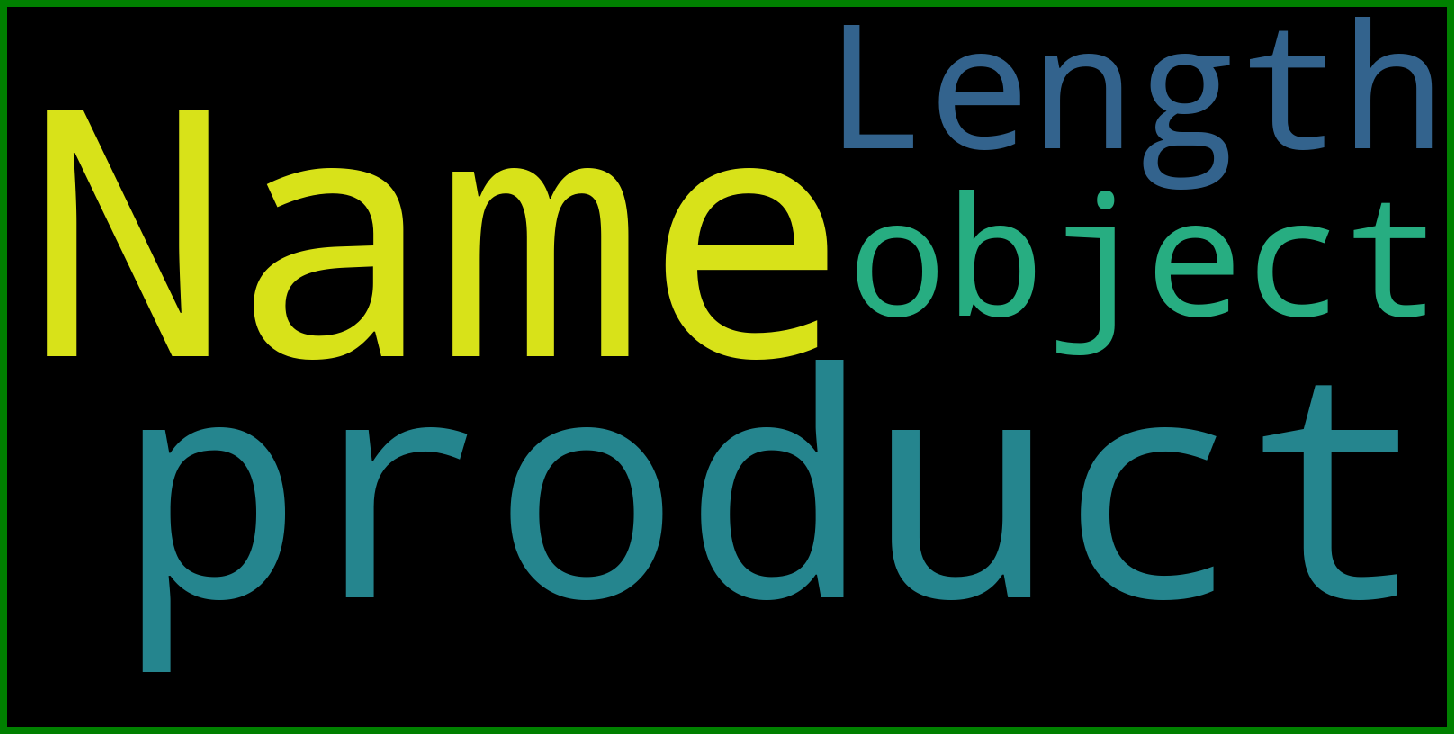

In [19]:
#comparing data for products

full_old_prod,top5_old_prod = converter(old_data["product"])
wordcloud = WordCloud(width=1600, height=800).generate(full_old_prod)
plt.figure( figsize=(20,10), facecolor='g')
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
# plt.savefig('old data products.png')
plt.show()

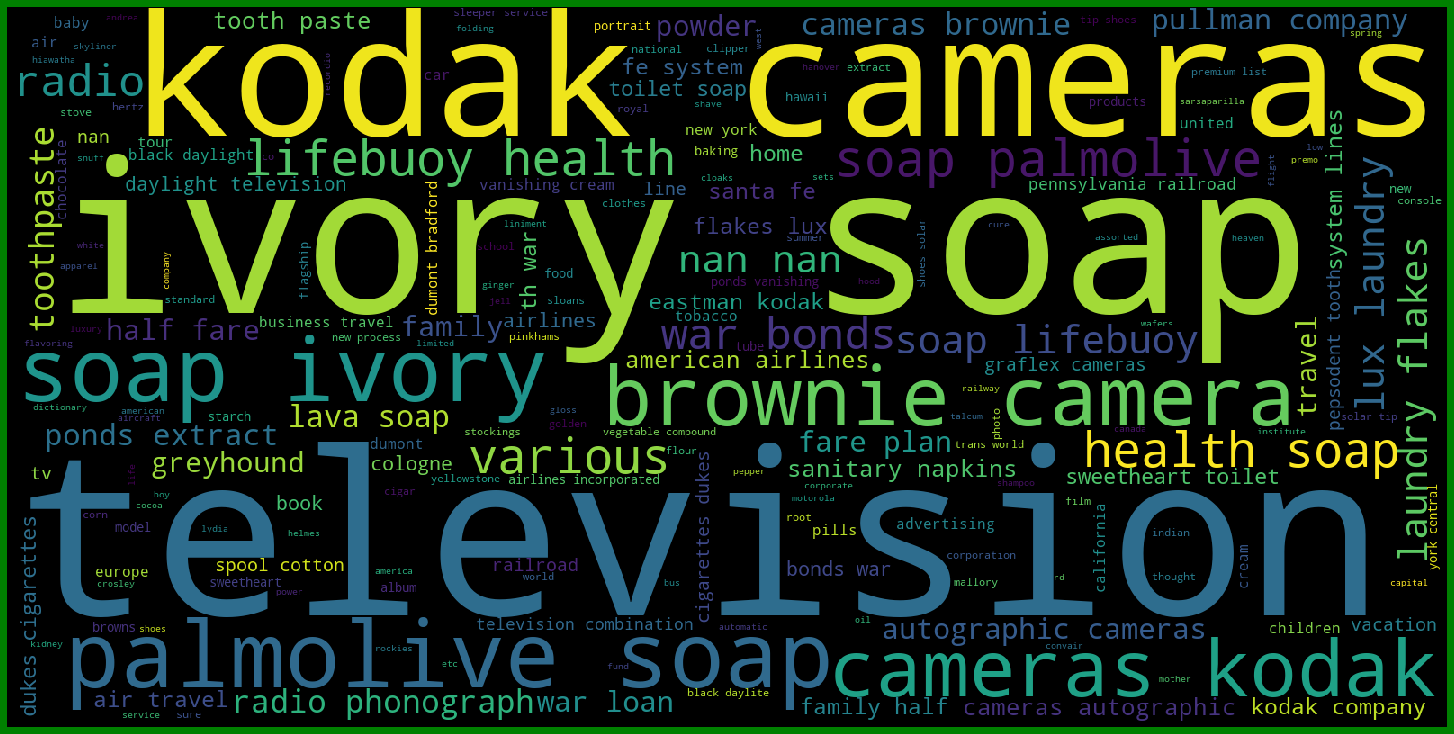

company
Kodak                                   123
Procter & Gamble Co.                     61
Lever Brothers Company                   37
Palmolive Company                        34
Allen B. DuMont Laboratories, Inc.       21
American Airlines, Inc.                  21
Magnavox Company                         20
Greyhound                                19
Lever Bros.                              18
Ponds Extract Co.                        16
General Electric Company                 16
Pepsodent Company                        13
Motorola Inc.                            13
Santa Fe System Lines                    12
Trans World Airline                      12
SweetHeart                               12
United Air Lines                         11
Pullman Company                          11
New York Central System                  11
Westinghouse Electric Corporation         9

In [20]:
total_data = pd.read_csv("C:\\Users\\eitan\\Documents\\completedata.csv",encoding='UTF-8')
# top50_subject
# indexNames = total_data[total_data['subject'] == "NaN"].index
# # Delete the unknown
# total_data.drop(indexNames , inplace=True)
# indexNames = total_data[total_data['subject'] == None].index
# # Delete the unknown
# total_data.drop(indexNames , inplace=True)
total_data_child = total_data[total_data['subject'].str.contains('Child', regex=False,na=False)]
company_freq_child = total_data_child['company'].value_counts()
company_freq_child = pd.DataFrame(company_freq_child.head(20))
child_company,top5_child_company = converter(total_data_child["product"])
wordcloud = WordCloud(width=1600, height=800).generate(child_company)
plt.figure( figsize=(20,10), facecolor='g')
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
# plt.savefig('child_company.png')
plt.show()
company_freq_child

In [115]:
# child_company,top5_child_company = converter_sub(total_data_child["name"])
filtered_word_string_child,top5_tot = converter(total_data_child["name"])
# wordcloud = WordCloud(width=1600, height=800).generate(child_company)
filtered_word_string_child

'gang sea island cotton rice negroes louis de saussure mechanics institute school auction sale negroes anti-tobacco medal prime negroes accustomed culture rice louis de saussure list rice field negroes sale j ryan public auction list rice field negroes sale j ryan public auction prime gang negroes louis desaussure estate sale order executor louis desaussure greenwood seminary young ladies near lebanon tennessee west tennessee college jackson tennessee noble charity tickets one dollar something new boys mrs winslows domestic receipt book home insurance company compliments season educational notes b model fast line via washington youths companion god created man image maryland military naval academy mount vernon institute medical journals listers agricultural chemical works beautiful story ayers american almanac dukes postage stamp album simon walker want arbuckles premium list austens forest flower cologne birthday greetings four lactated food babies johnstown horror valley death healy 

In [116]:
tokens_word_children = word_tokenize(filtered_word_string_child)
children_words = make_df(tokens_word_children)
children_words = children_words[children_words['value'].map(len) > 2]
top_children = children_words.head(20)
# tokens_word_children

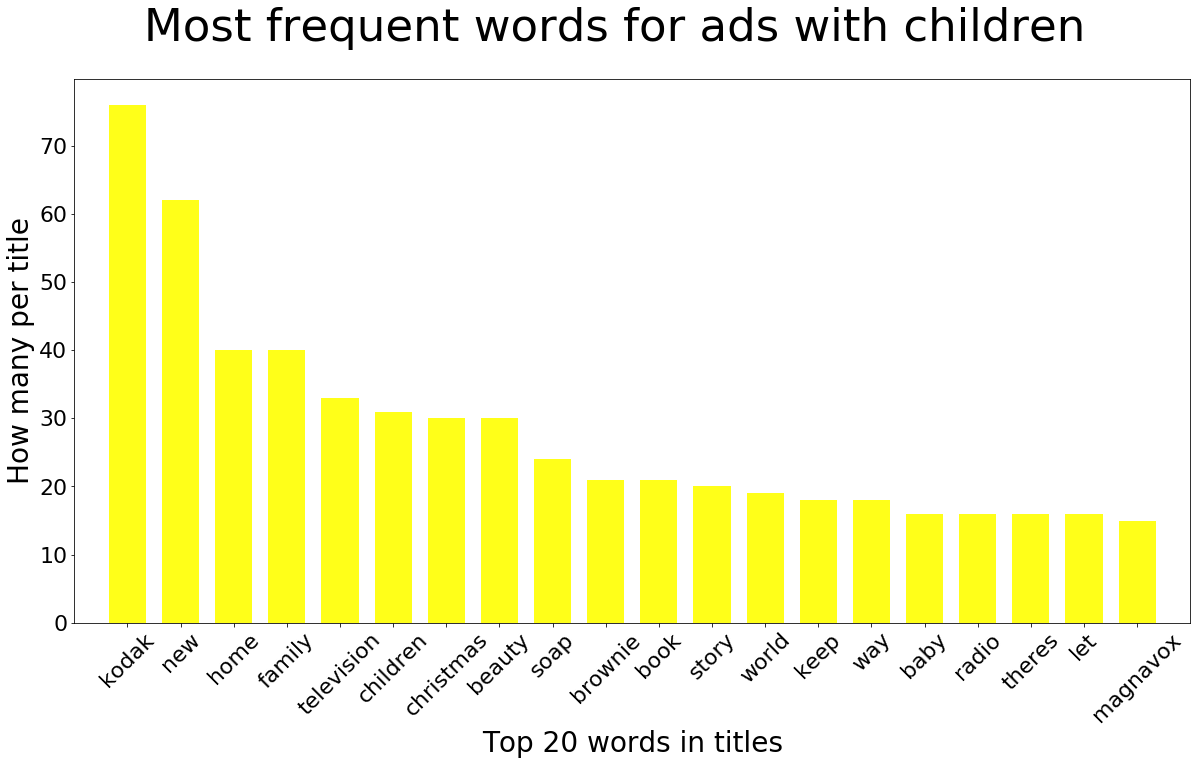

In [273]:
#plotting reality check
height = top_children["num"]
bars = top_children["value"]
y_pos = bars

plt.subplots(figsize=(20,10))
# Create bars
plt.bar(y_pos, height, width=0.7, alpha=0.9, color="yellow")

# Create names on the x-axis
plt.xticks(rotation=45, fontsize=8)


#plt.xlabel('x-axis')
plt.xticks(y_pos, bars)
plt.tick_params(axis="x",which="major",labelsize=22)
plt.tick_params(axis="y",which="major",labelsize=22)

plt.ylabel('How many per title', fontsize=28)
plt.xlabel('Top 20 words in titles', fontsize=28)

plt.xlim(-1,20)
plt.suptitle('Most frequent words for ads with children', fontsize=45)

# Show graphic
plt.savefig('top children ads.png')
plt.show()

In [112]:
total_data_air = total_data[total_data['subject'].str.contains('Air', regex=False,na=False)]
company_freq_air = total_data_air['company'].value_counts()
company_freq_air = pd.DataFrame(company_freq_air.head(20))
filtered_word_string_air,top5_air = converter(total_data_air["name"])
tokens_word_air = word_tokenize(filtered_word_string_air)
air_words = make_df(tokens_word_air)
top_air_words = air_words.head(20)

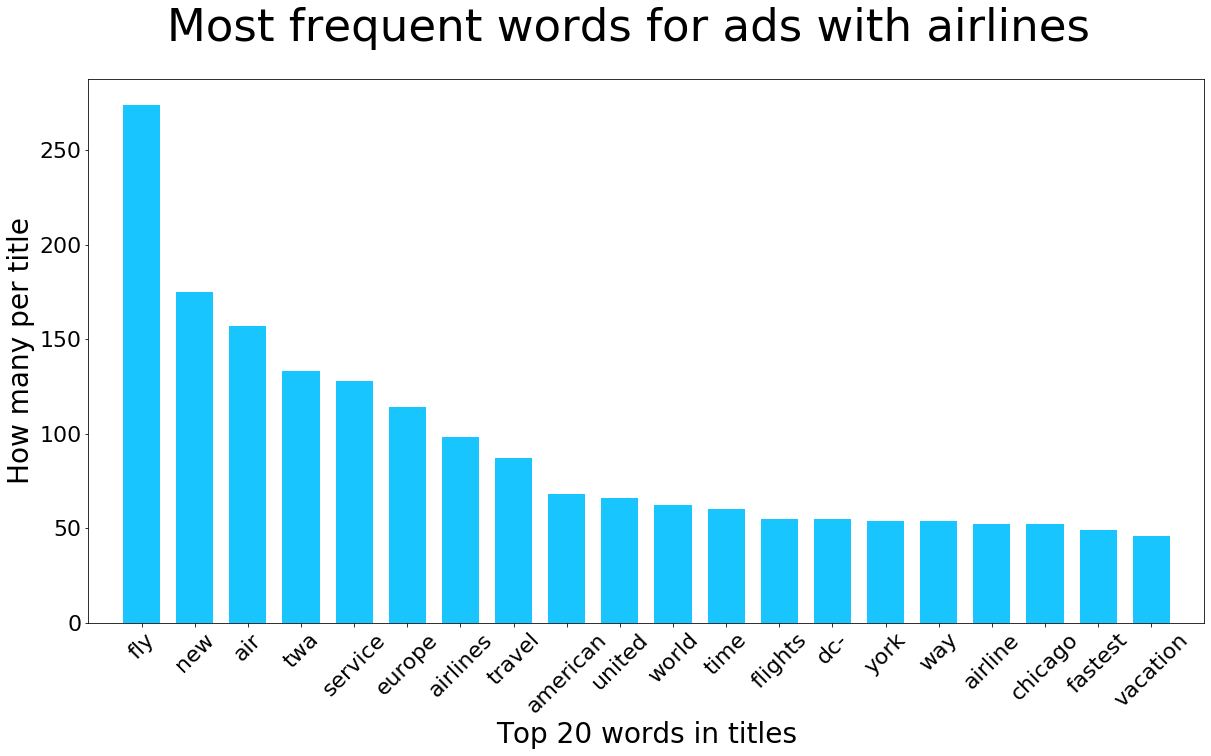

In [274]:
#plotting reality check
height = top_air_words["num"]
bars = top_air_words["value"]
y_pos = bars

plt.subplots(figsize=(20,10))
# Create bars
plt.bar(y_pos, height, width=0.7, alpha=0.9, color="deepskyblue")

# Create names on the x-axis
plt.xticks(rotation=45, fontsize=8)


#plt.xlabel('x-axis')
plt.xticks(y_pos, bars)
plt.tick_params(axis="x",which="major",labelsize=22)
plt.tick_params(axis="y",which="major",labelsize=22)
plt.ylabel('How many per title', fontsize=28)
plt.xlabel('Top 20 words in titles', fontsize=28)

plt.xlim(-1,20)
plt.suptitle('Most frequent words for ads with airlines', fontsize=45)

# Show graphic
plt.savefig('top airlines ads.png')
plt.show()

In [111]:
total_data_military = total_data[total_data['subject'].str.contains('Military', regex=False,na=False)]
company_freq_military = total_data_military['company'].value_counts()
company_freq_military = pd.DataFrame(company_freq_military.head(20))
filtered_word_string_military,top5_military = converter(total_data_military["name"])
tokens_word_mililtary = word_tokenize(filtered_word_string_military)
military_words = make_df(tokens_word_mililtary)
military_words = military_words[military_words['value'].map(len) > 2]
top_military_words = military_words.head(20)


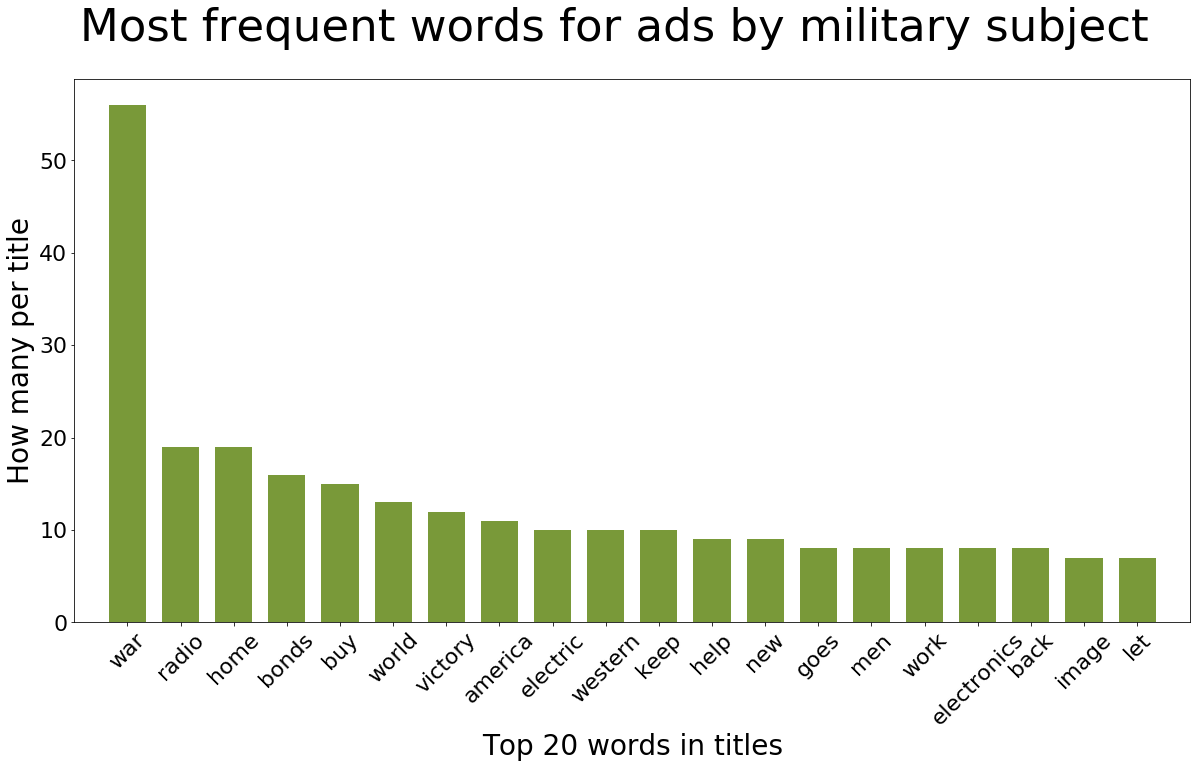

In [275]:
#plotting reality check
height = top_military_words["num"]
bars = top_military_words["value"]
y_pos = bars

plt.subplots(figsize=(20,10))
# Create bars
plt.bar(y_pos, height, width=0.7, alpha=0.9, color="olivedrab")

# Create names on the x-axis
plt.xticks(rotation=45, fontsize=8)


#plt.xlabel('x-axis')
plt.xticks(y_pos, bars)
plt.tick_params(axis="x",which="major",labelsize=22)
plt.tick_params(axis="y",which="major",labelsize=22)
plt.ylabel('How many per title', fontsize=28)
plt.xlabel('Top 20 words in titles', fontsize=28)

plt.xlim(-1,20)
plt.suptitle('Most frequent words for ads by military subject', fontsize=45)

# Show graphic
plt.savefig('top military ads.png')
plt.show()

In [109]:
total_data_war = total_data[total_data['subject'].str.contains('War', regex=False,na=False)]
company_freq_war = total_data_war['company'].value_counts()
company_freq_war = pd.DataFrame(company_freq_war.head(20))
filtered_word_string_war,top5_war = converter(total_data_war["name"])
tokens_word_war = word_tokenize(filtered_word_string_war)
war_words = make_df(tokens_word_war)
war_words = war_words[war_words['value'].map(len) >= 2]
top_war_words = war_words.head(20)

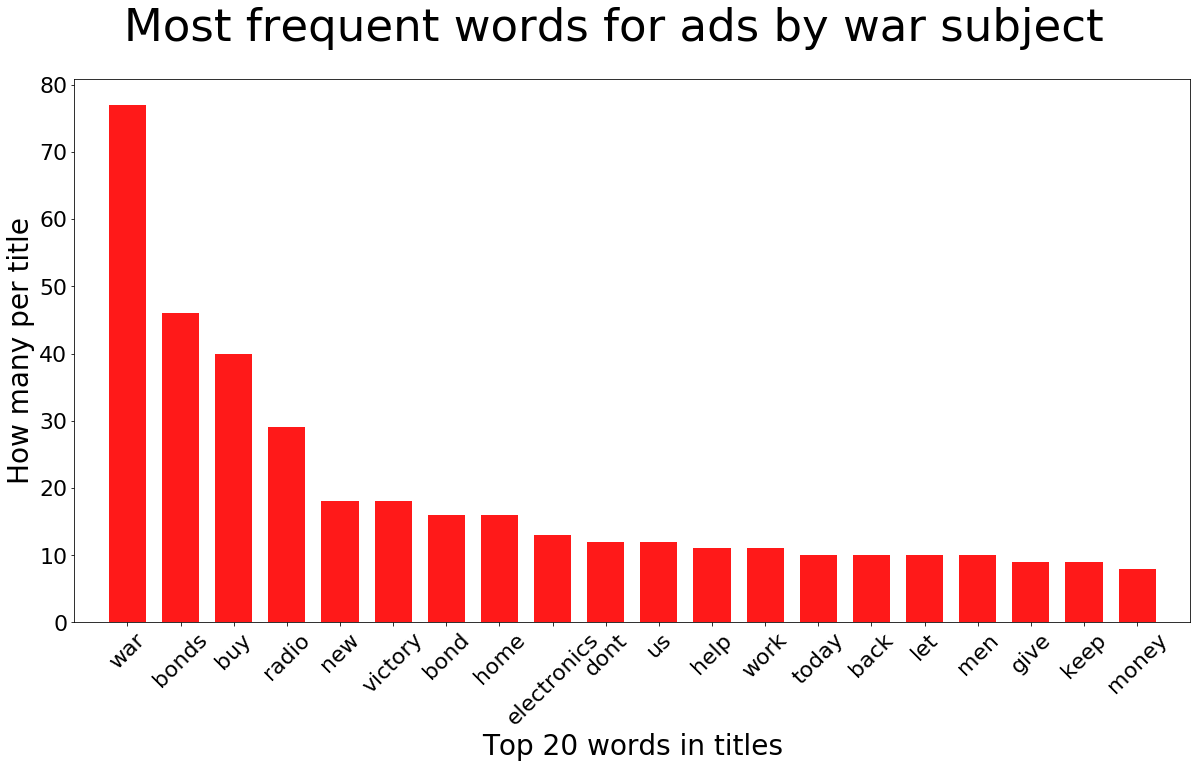

In [276]:
#plotting reality check
height = top_war_words["num"]
bars = top_war_words["value"]
y_pos = bars

plt.subplots(figsize=(20,10))
# Create bars
plt.bar(y_pos, height, width=0.7, alpha=0.9, color="red")

# Create names on the x-axis
plt.xticks(rotation=45, fontsize=8)


#plt.xlabel('x-axis')
plt.xticks(y_pos, bars)
plt.tick_params(axis="x",which="major",labelsize=22)
plt.tick_params(axis="y",which="major",labelsize=22)
plt.ylabel('How many per title', fontsize=28)
plt.xlabel('Top 20 words in titles', fontsize=28)

plt.xlim(-1,20)
plt.suptitle('Most frequent words for ads by war subject', fontsize=45)

# Show graphic
plt.savefig('top war ads.png')
plt.show()

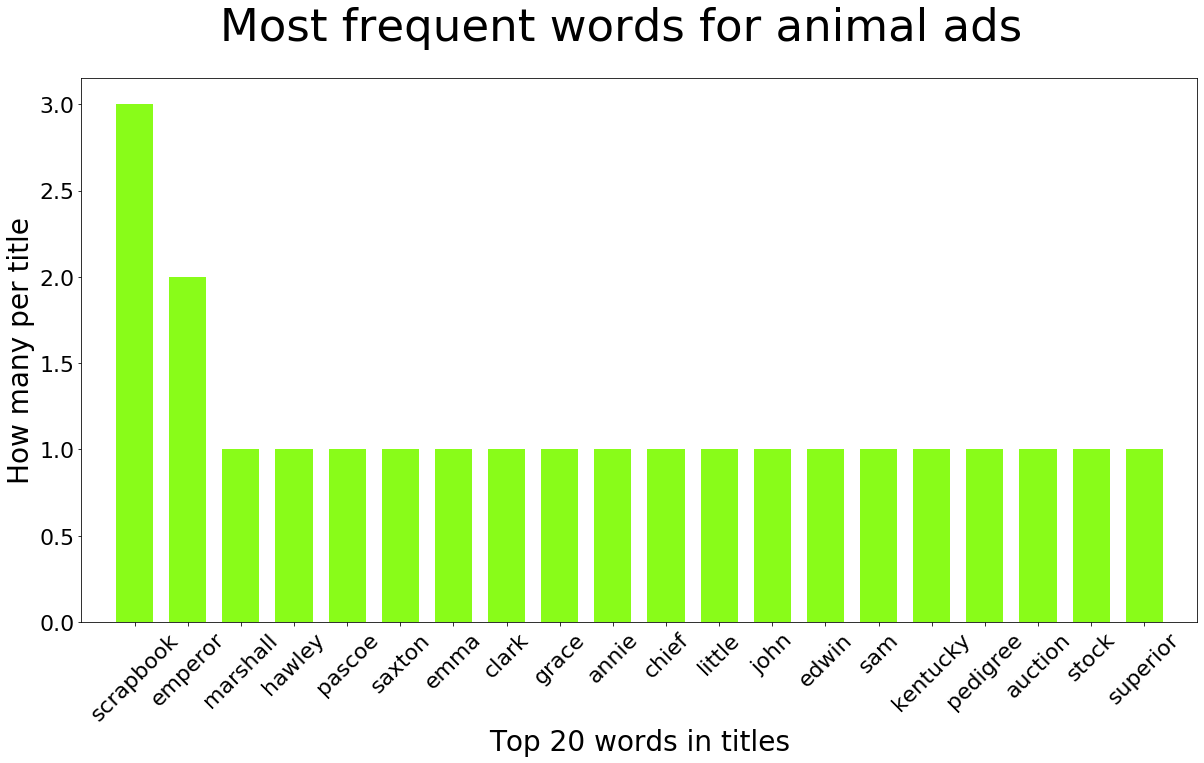

In [277]:
total_data_animal = total_data[total_data['subject'].str.contains('Animal', regex=False,na=False)]
company_freq_animal = total_data_animal['name'].value_counts()
company_freq_animal = pd.DataFrame(company_freq_animal.head(20))
filtered_word_string_animal,top5_animal = converter(total_data_animal["name"])
tokens_word_animal = word_tokenize(filtered_word_string_animal)
animal_words = make_df(tokens_word_animal)
animal_words = animal_words[animal_words['value'].map(len) > 2]
top_animal_words = animal_words.head(20)
#plotting reality check
height = top_animal_words["num"]
bars = top_animal_words["value"]
y_pos = bars

plt.subplots(figsize=(20,10))
# Create bars
plt.bar(y_pos, height, width=0.7, alpha=0.9, color="lawngreen")

# Create names on the x-axis
plt.xticks(rotation=45, fontsize=8)


#plt.xlabel('x-axis')
plt.xticks(y_pos, bars)
plt.tick_params(axis="x",which="major",labelsize=22)
plt.tick_params(axis="y",which="major",labelsize=22)
plt.ylabel('How many per title', fontsize=28)
plt.xlabel('Top 20 words in titles', fontsize=28)

plt.xlim(-1,20)
plt.suptitle('Most frequent words for animal ads', fontsize=45)

# Show graphic
plt.savefig('top animal ads.png')
plt.show()

In [91]:
total_data_transportation = total_data[total_data['category'].str.contains('Trans', regex=False,na=False)]
filtered_word_string_trans_name,top5_trans_name = converter(total_data_transportation["name"])
tokens_word_trans_name = word_tokenize(filtered_word_string_trans_name)
filtered_word_string_trans_sub,top5_trans_sub = converter(total_data_transportation["subject"])
tokens_word_trans_sub = word_tokenize(filtered_word_string_trans_sub)
trans_words_sub = make_df(tokens_word_trans_sub)
filtered_word_string_trans_prod,top5_trans_prod = converter(total_data_transportation["product"])
tokens_word_trans_prod = word_tokenize(filtered_word_string_trans_prod)
trans_words_prod = make_df(tokens_word_trans_prod)

# children_words = children_words[children_words['value'].map(len) > 2]
# top_trans_words_name = trans_words_name.head(10)
top_trans_words_sub = trans_words_sub.head(10)
top_trans_words_prod = trans_words_prod.head(10)

value  num    x
870   airlines  291    1
868     travel  147    2
852   american  137    3
880        air  113    4
815    service  104    5
..         ...  ...  ...
323    upstate    1  880
327    contest    1  881
328  king-size    1  882
329     dining    1  883
442    suitair    1  884

[884 rows x 3 columns]

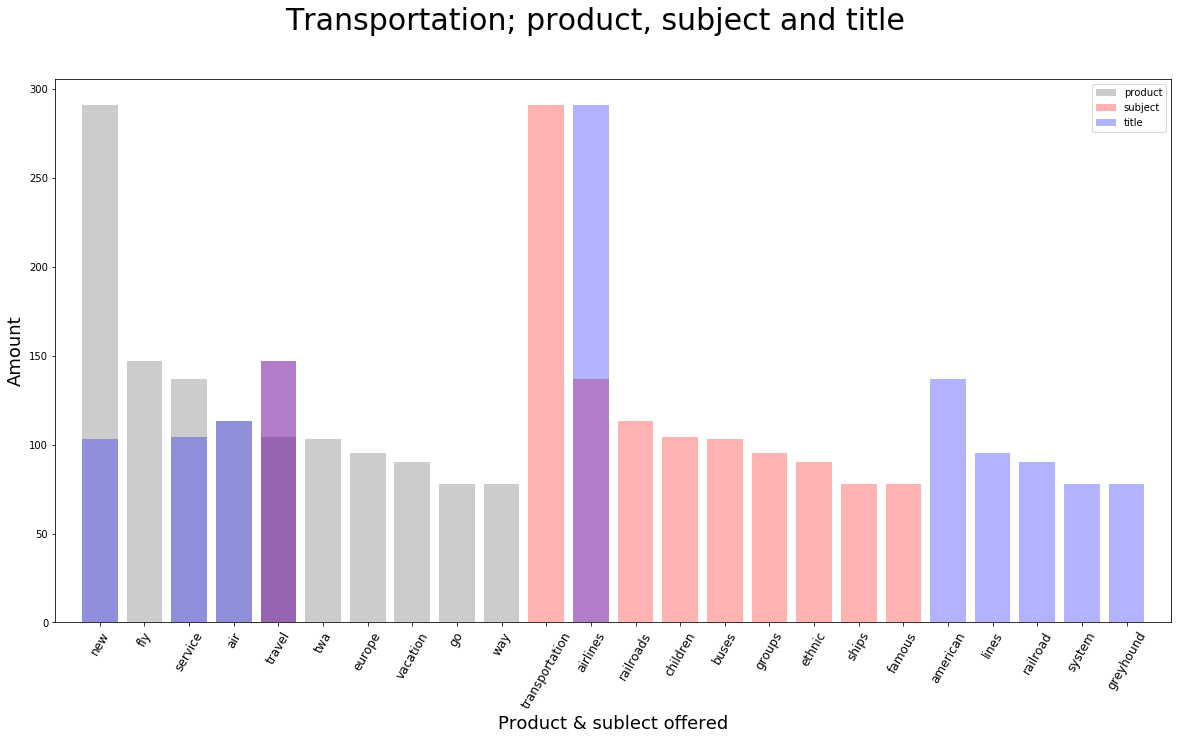

In [387]:
#plotting reality check
height = top_trans_words_prod["num"]
bars = top_trans_words_prod["value"]
y_pos = bars
sub = top_trans_words_sub["value"]
name = top_trans_words_name["value"]


plt.subplots(figsize=(20,10))
plt.xticks(rotation=60, fontsize=8)


plt.tick_params(axis="x",which="major",labelsize=12)
plt.ylabel('Amount', fontsize=18)
plt.xlabel('Product & sublect offered', fontsize=18)

rects1 = plt.bar(name, height, width=0.8, alpha=0.2, color="black")
rects2 = plt.bar(sub, height, width=0.8, alpha=0.3, color="red")
rects3 = plt.bar(y_pos, height, width=0.8, alpha=0.3, color="blue")
plt.legend( (rects1[0], rects2[0], rects3[0]), ('product', 'subject', 'title') )

plt.xlim(-1,24)
plt.suptitle('Transportation; product, subject and title', fontsize=30)

# Show graphic
# plt.savefig('Transportation; product, subject and title.png')
plt.show()

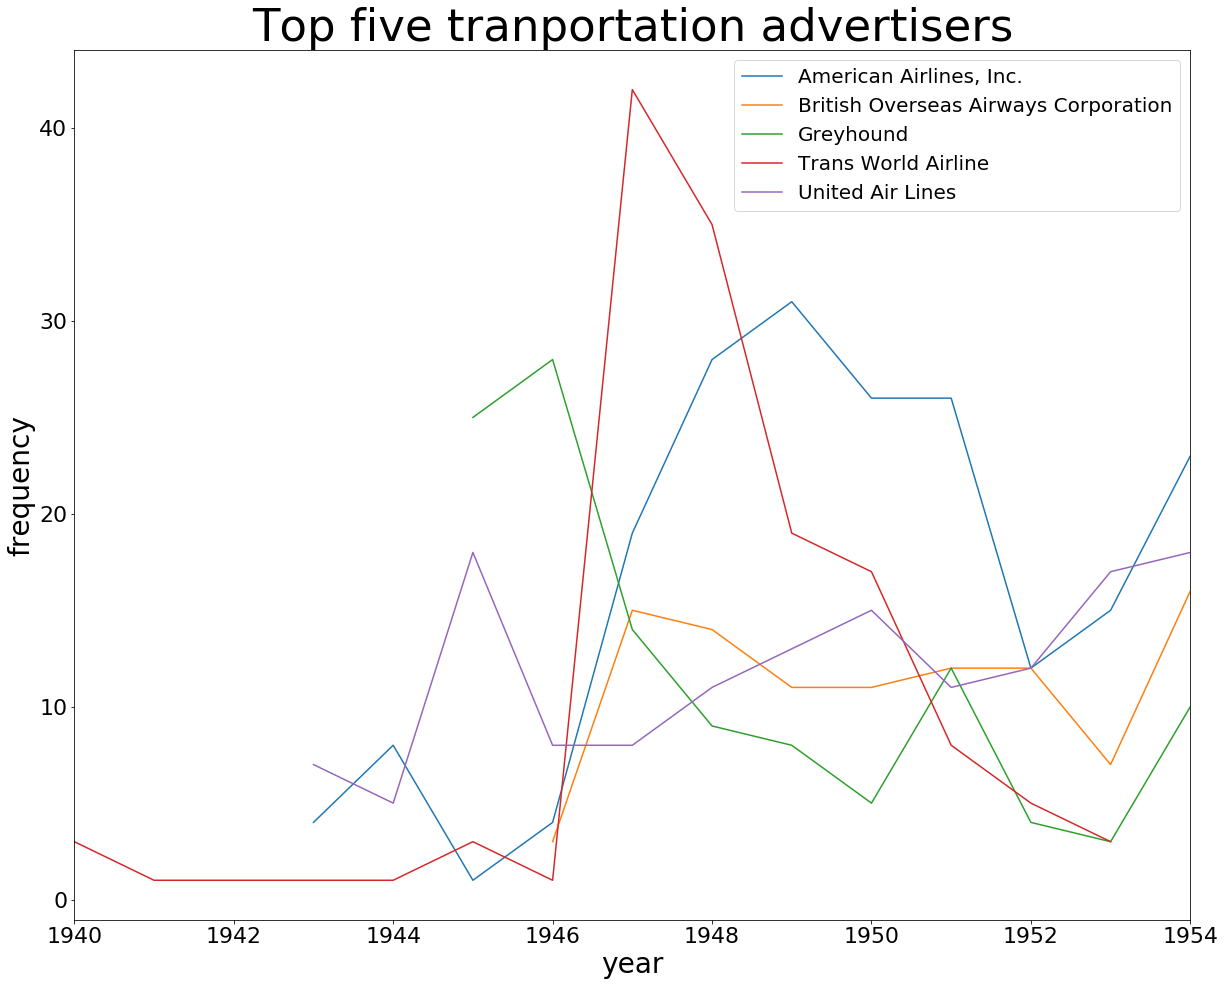

In [283]:
company_trans = total_data_transportation['company'].value_counts()
top5 = pd.DataFrame(company_trans.head(5))
names_top5 = list(top5.index)
trans_top5_c = total_data_transportation[total_data_transportation['company'].isin(names_top5)]
data_top5_agg_c = trans_top5_c[trans_top5_c['year'].map(len) == 4]
data_top5_agg_c = pd.DataFrame(data_top5_agg_c)
data_top5_agg_c['year'] = pd.to_numeric(data_top5_agg_c['year'])
data_top5_agg_c = pd.DataFrame(data_top5_agg_c.groupby(["company","year"]).size())
data_top5_agg_c.reset_index(inplace=True)  
pivot_table_top5_c = data_top5_agg_c.pivot(index='year',columns='company',values=0)
pivot_table_top5_c.plot(figsize=(20,16))
plt.tick_params(axis="x",which="major",labelsize=22)
plt.tick_params(axis="y",which="major",labelsize=22)
plt.legend(prop={"size":20})
plt.ylabel("frequency", size=28)
plt.xlabel("year", size=28)
plt.title("Top five tranportation advertisers", size=45)
plt.savefig('Top five transportation advertisers.png')

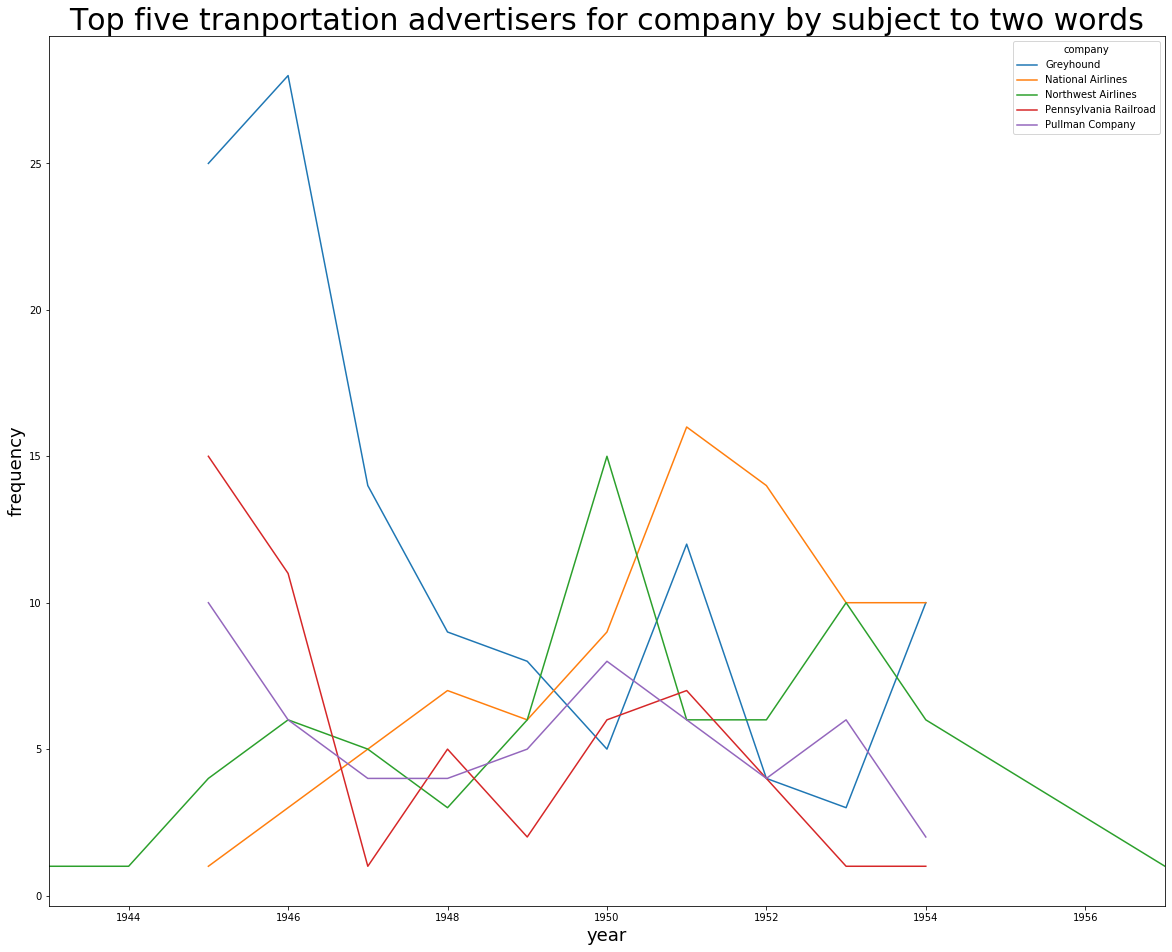

In [106]:
company_trans = pd.DataFrame(company_trans)
company_trans['subject'] = company_trans.index
company_trans_s = company_trans[company_trans['subject'].str.split().str.len().lt(3)]
top5 = pd.DataFrame(company_trans_s.head(5))
names_top5 = list(top5.index)
trans_top5_c = total_data_transportation[total_data_transportation['company'].isin(names_top5)]
data_top5_agg_c = trans_top5_c[trans_top5_c['year'].map(len) == 4]
data_top5_agg_c = pd.DataFrame(data_top5_agg_c)
data_top5_agg_c['year'] = pd.to_numeric(data_top5_agg_c['year'])
data_top5_agg_c = pd.DataFrame(data_top5_agg_c.groupby(["company","year"]).size())
data_top5_agg_c.reset_index(inplace=True)  
pivot_table_top5_c = data_top5_agg_c.pivot(index='year',columns='company',values=0)
pivot_table_top5_c.plot(figsize=(20,16))
plt.ylabel("frequency", size=18)
plt.xlabel("year", size=18)
plt.title("Top five tranportation advertisers for company by subject to two words", size=30)
# plt.savefig('Top five tranportation advertisers for company by subject to two words.png')

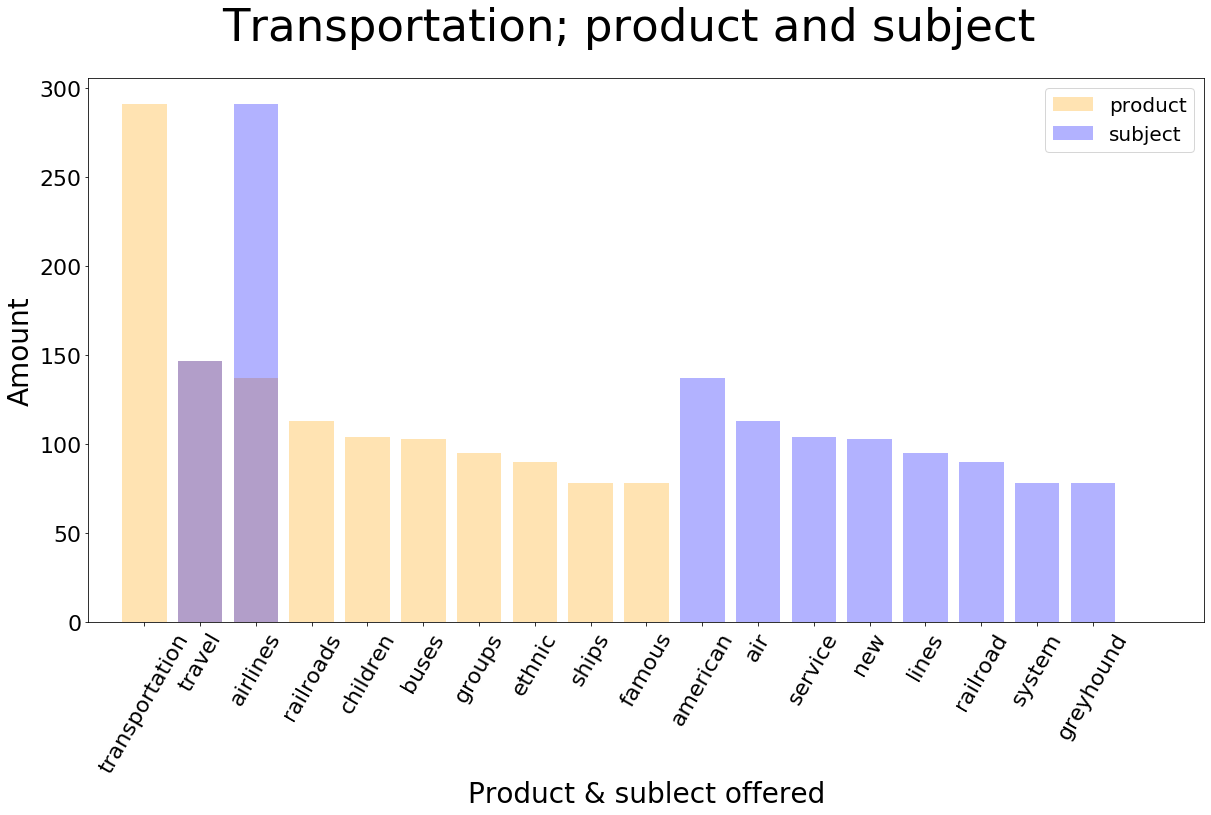

In [281]:
height = top_trans_words_prod["num"]
bars = top_trans_words_prod["value"]
y_pos = bars
sub = top_trans_words_sub["value"]
# name = top_trans_words_name["value"]


plt.subplots(figsize=(20,10))
plt.xticks(rotation=60, fontsize=8)


plt.ylabel('Amount', fontsize=28)
plt.xlabel('Product & sublect offered', fontsize=28)
plt.tick_params(axis="x",which="major",labelsize=22)
plt.tick_params(axis="y",which="major",labelsize=22)


# rects1 = plt.bar(name, height, width=0.8, alpha=0.2, color="black")
rects2 = plt.bar(sub, height, width=0.8, alpha=0.3, color="orange")
rects3 = plt.bar(y_pos, height, width=0.8, alpha=0.3, color="blue")
plt.legend( (rects2[0], rects3[0]), ('product', 'subject', 'title'),prop={"size":20})

plt.xlim(-1,19)
plt.suptitle('Transportation; product and subject', fontsize=45)

# Show graphic
plt.savefig('Transportation; product and subject.png')
plt.show()

In [11]:
total_data_tobacco = total_data[total_data['category'].str.contains('Tobacco', regex=False,na=False)]
filtered_word_string_tobacco,top5_tobacco = converter(total_data_tobacco["name"])
tokens_word_tobacco = word_tokenize(filtered_word_string_tobacco)
tobacco_words = make_df(tokens_word_tobacco)
tobacco_words = tobacco_words[tobacco_words['value'].map(len) > 2]
top_tobacco_words = tobacco_words.head(20)

In [109]:
result

0  num
0                               Metamorphic Trade Card    2
1                                    The International    2
2                           Forty Pounds Tobacco Stamp    2
3                           Packaging label (unmarked)    2
4                              Ten Pound Tobacco Stamp    2
..                                                 ...  ...
935  Open before Christmas! heres why: theres so mu...    3
936  Thanks a lot, Dad - weve Always Wanted a Pentr...    3
937                               Three in the family!    3
938  the night before Christmas put Packard-Bell al...    3
939                        a Spring vacation in Europe    3

[1356 rows x 2 columns]

In [135]:
word_list2 = total_data_tobacco["name"].tolist()
word_list2 = [str(i) for i in word_list2]
tobac_df = pd.DataFrame(word_list2)
tobac_df["num"] = 2
word_list3 = total_data_child["name"].tolist()
word_list3 = [str(i) for i in word_list3]
child_df = pd.DataFrame(word_list3)
child_df["num"] = 3
frames = [tobac_df, child_df]
result = pd.concat(frames)

word_list_merged = word_list2+word_list3

word_list_merged = [str(i) for i in word_list_merged]
child_df.shape

(940, 2)

In [133]:
documents = word_list_merged
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(documents)
true_k = 2
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
model.fit(X)
print("Top terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
for i in range(true_k):
    print( "Cluster %d:" % i)
    for ind in order_centroids[i, :10]:
        print( ' %s' % terms[ind])
    print

(188, 3)
(228, 3)
(933, 3)
(7, 3)


In [ ]:
pred = model.predict(X)
result["predicted"] = pred
result20 = result.loc[(result['num'] == 2) & (result['predicted'] == 0) ]
result21 = result.loc[(result['num'] == 2) & (result['predicted'] == 1) ]
result30 = result.loc[(result['num'] == 3) & (result['predicted'] == 0) ]
result31 = result.loc[(result['num'] == 3) & (result['predicted'] == 1) ]
print(result20.shape)
print(result21.shape)
print(result30.shape)
print(result31.shape)

C:\Users\eitan\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\eitan\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


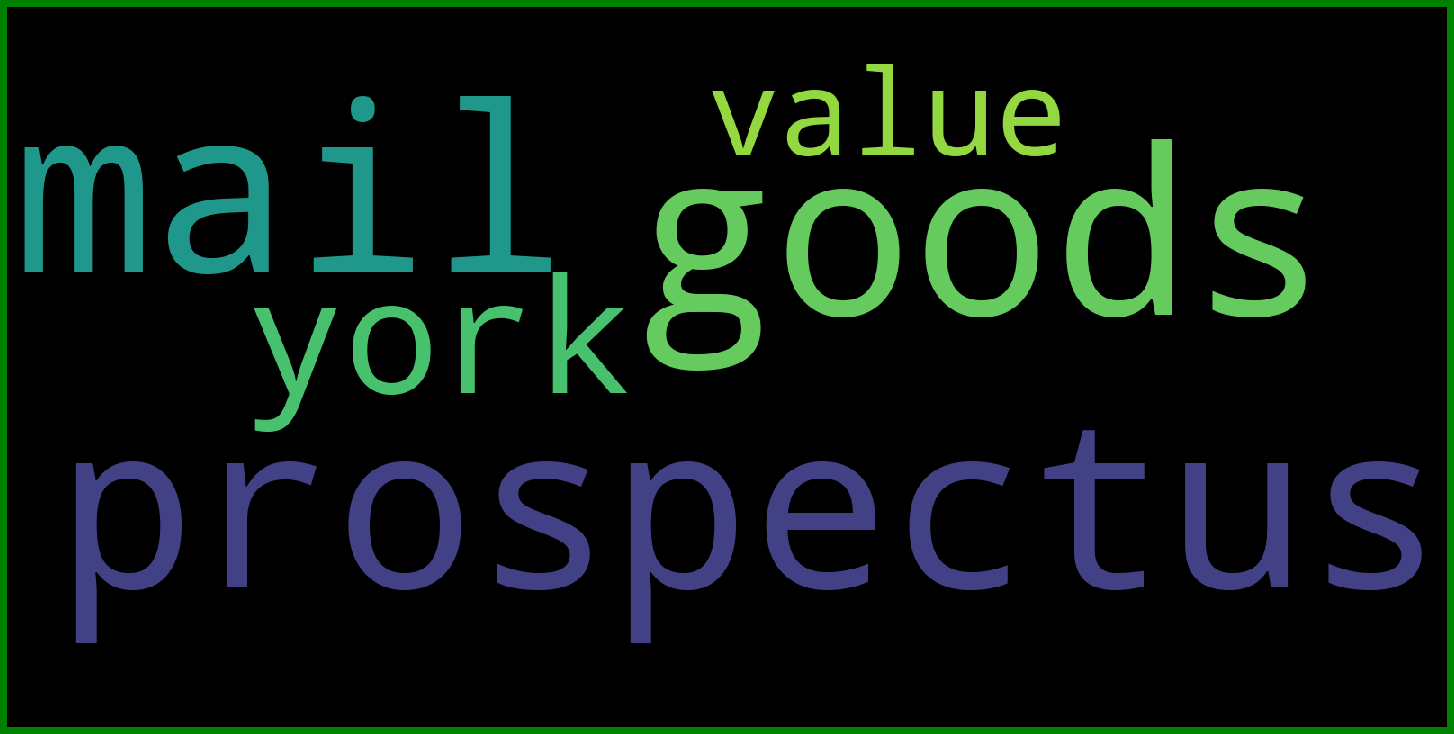

In [229]:
df = df1[["year","name"]]
m = df["name"].str.findall(" new (\w+)",flags=re.IGNORECASE)
b = df["name"].str.findall("^new (\w+)",flags=re.IGNORECASE)
r = df["name"].str.findall(" new-(\w+)",flags=re.IGNORECASE)
t = df["name"].str.findall("^new-(\w+)",flags=re.IGNORECASE)
o = df["name"].str.findall(" -new(\w+)",flags=re.IGNORECASE)
y = df["name"].str.findall("^-new(\w+)",flags=re.IGNORECASE)
k=b+m+r+t+o+y

df["second"] = k
df['second'] = df['second'].str[0]


after_new = converter(df['second'])
after_new = str(after_new).split(' ')

after_new = str(after_new)
l =  after_new.replace("nan", "")
l = str(l)
l = l.replace("\n","")
l = l.replace("num","")
l = l.replace("n0","")
l = l.replace("n1","")
l = l.replace("n2","")
l = l.replace("n3","")
l = l.replace("n4","")
l = l.replace("n5","")
l = l.replace("n6","")
l = l.replace("n7","")
l = l.replace("n8","")
l = l.replace("n9","")
l = re.sub(r'[\W_]+', ' ', l)
wordcloud = WordCloud(width=1600, height=800).generate(l)
plt.figure( figsize=(20,10), facecolor='g')
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.savefig('words following new df1.png')
plt.show()

C:\Users\eitan\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\eitan\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


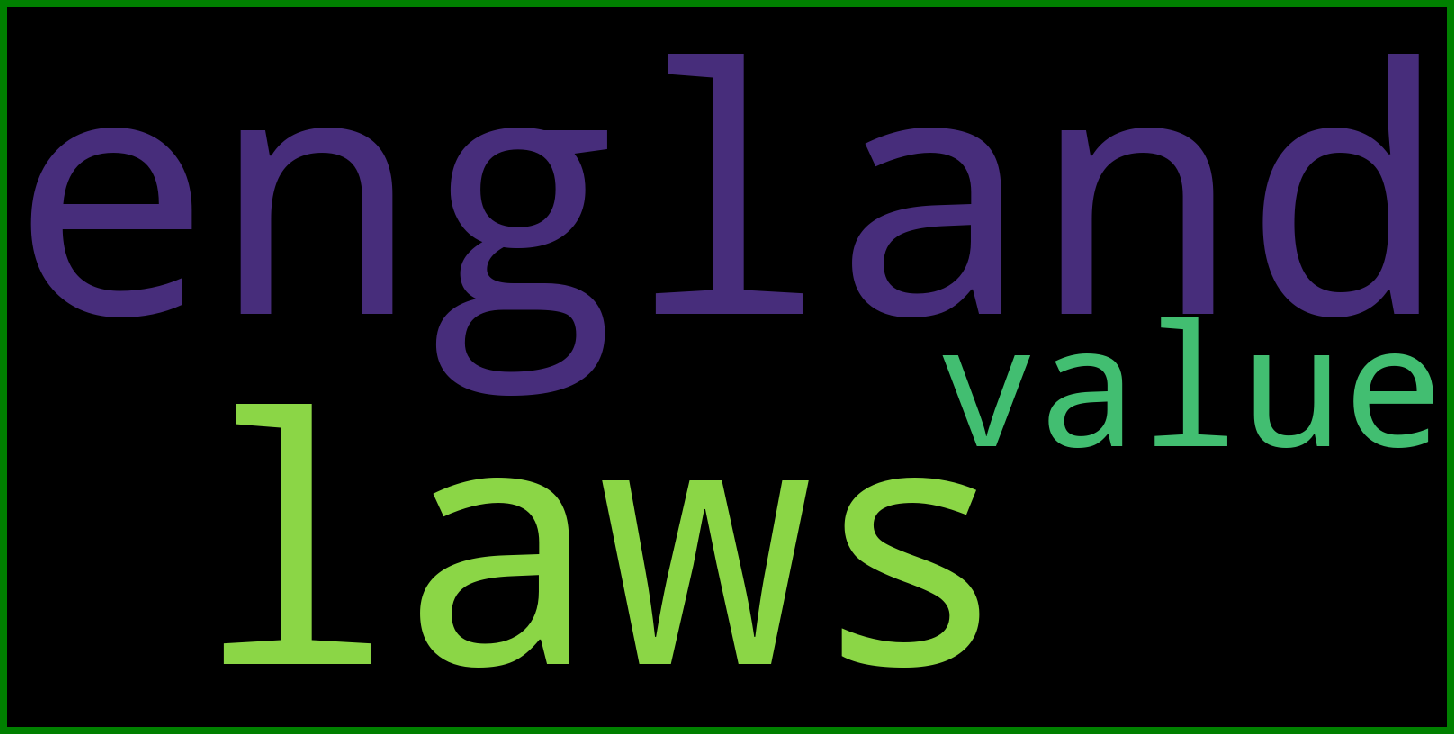

In [230]:
df = df2[["year","name"]]
m = df["name"].str.findall(" new (\w+)",flags=re.IGNORECASE)
b = df["name"].str.findall("^new (\w+)",flags=re.IGNORECASE)
r = df["name"].str.findall(" new-(\w+)",flags=re.IGNORECASE)
t = df["name"].str.findall("^new-(\w+)",flags=re.IGNORECASE)
o = df["name"].str.findall(" -new(\w+)",flags=re.IGNORECASE)
y = df["name"].str.findall("^-new(\w+)",flags=re.IGNORECASE)
k=b+m+r+t+o+y

df["second"] = k
df['second'] = df['second'].str[0]


after_new = converter(df['second'])
after_new = str(after_new).split(' ')

after_new = str(after_new)
l =  after_new.replace("nan", "")
l = str(l)
l = l.replace("\n","")
l = l.replace("num","")
l = l.replace("n0","")
l = l.replace("n1","")
l = l.replace("n2","")
l = l.replace("n3","")
l = l.replace("n4","")
l = l.replace("n5","")
l = l.replace("n6","")
l = l.replace("n7","")
l = l.replace("n8","")
l = l.replace("n9","")
l = re.sub(r'[\W_]+', ' ', l)
wordcloud = WordCloud(width=1600, height=800).generate(l)
plt.figure( figsize=(20,10), facecolor='g')
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.savefig('words following new df2.png')
plt.show()

C:\Users\eitan\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\eitan\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


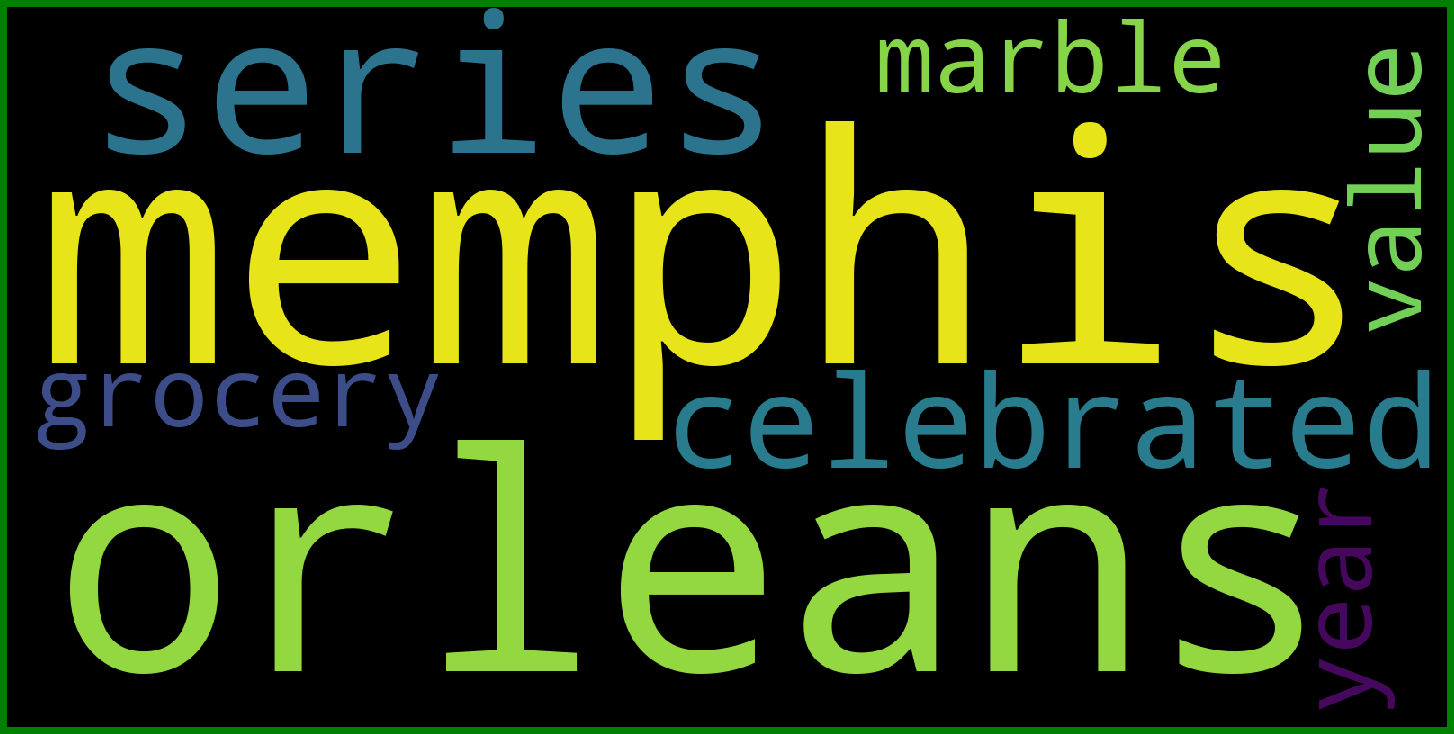

In [231]:
df = df3[["year","name"]]
m = df["name"].str.findall(" new (\w+)",flags=re.IGNORECASE)
b = df["name"].str.findall("^new (\w+)",flags=re.IGNORECASE)
r = df["name"].str.findall(" new-(\w+)",flags=re.IGNORECASE)
t = df["name"].str.findall("^new-(\w+)",flags=re.IGNORECASE)
o = df["name"].str.findall(" -new(\w+)",flags=re.IGNORECASE)
y = df["name"].str.findall("^-new(\w+)",flags=re.IGNORECASE)
k=b+m+r+t+o+y

df["second"] = k
df['second'] = df['second'].str[0]


after_new = converter(df['second'])
after_new = str(after_new).split(' ')

after_new = str(after_new)
l =  after_new.replace("nan", "")
l = str(l)
l = l.replace("\n","")
l = l.replace("num","")
l = l.replace("n0","")
l = l.replace("n1","")
l = l.replace("n2","")
l = l.replace("n3","")
l = l.replace("n4","")
l = l.replace("n5","")
l = l.replace("n6","")
l = l.replace("n7","")
l = l.replace("n8","")
l = l.replace("n9","")
l = re.sub(r'[\W_]+', ' ', l)
wordcloud = WordCloud(width=1600, height=800).generate(l)
plt.figure( figsize=(20,10), facecolor='g')
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.savefig('words following new df3.png')
plt.show()

C:\Users\eitan\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\eitan\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


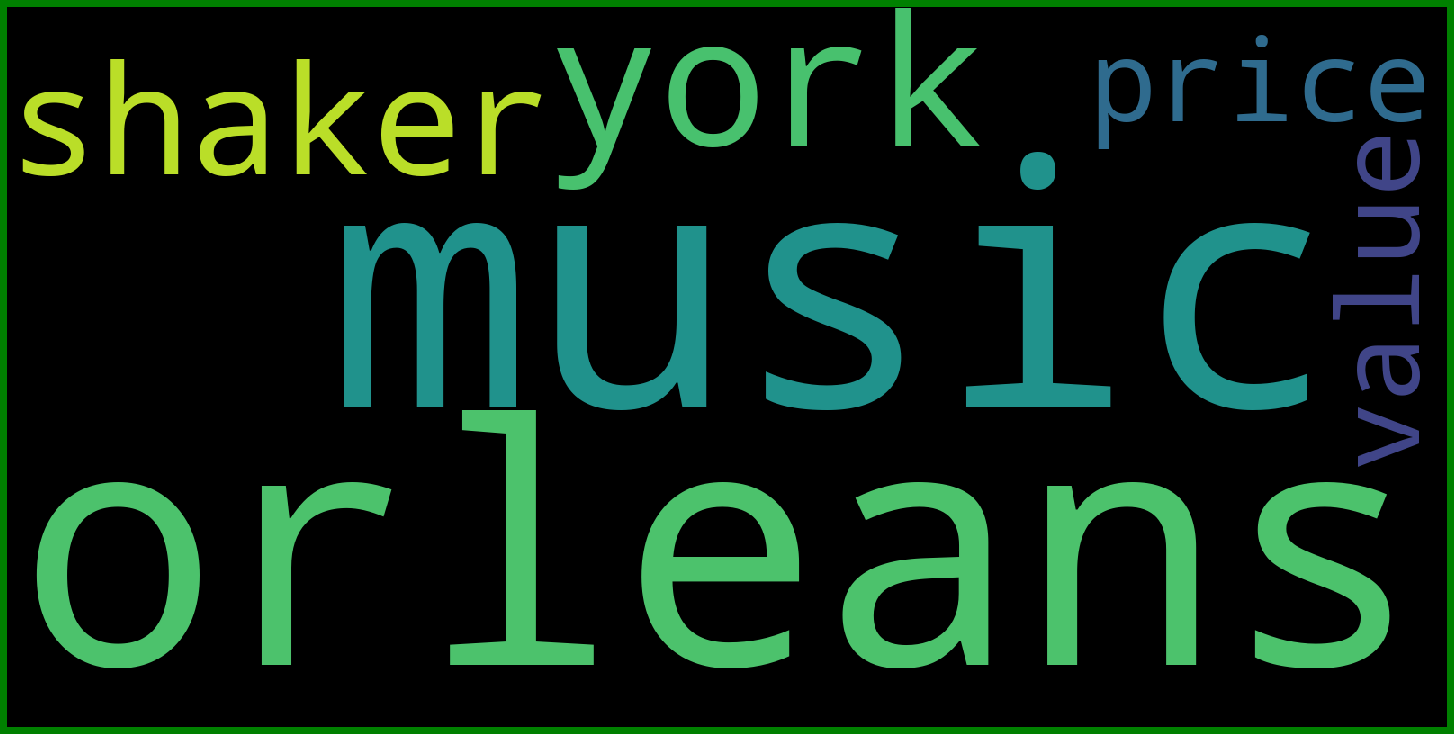

In [232]:
df = df4[["year","name"]]
m = df["name"].str.findall(" new (\w+)",flags=re.IGNORECASE)
b = df["name"].str.findall("^new (\w+)",flags=re.IGNORECASE)
r = df["name"].str.findall(" new-(\w+)",flags=re.IGNORECASE)
t = df["name"].str.findall("^new-(\w+)",flags=re.IGNORECASE)
o = df["name"].str.findall(" -new(\w+)",flags=re.IGNORECASE)
y = df["name"].str.findall("^-new(\w+)",flags=re.IGNORECASE)
k=b+m+r+t+o+y

df["second"] = k
df['second'] = df['second'].str[0]


after_new = converter(df['second'])
after_new = str(after_new).split(' ')

after_new = str(after_new)
l =  after_new.replace("nan", "")
l = str(l)
l = l.replace("\n","")
l = l.replace("num","")
l = l.replace("n0","")
l = l.replace("n1","")
l = l.replace("n2","")
l = l.replace("n3","")
l = l.replace("n4","")
l = l.replace("n5","")
l = l.replace("n6","")
l = l.replace("n7","")
l = l.replace("n8","")
l = l.replace("n9","")
l = re.sub(r'[\W_]+', ' ', l)
wordcloud = WordCloud(width=1600, height=800).generate(l)
plt.figure( figsize=(20,10), facecolor='g')
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.savefig('words following new df4.png')
plt.show()

C:\Users\eitan\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\eitan\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


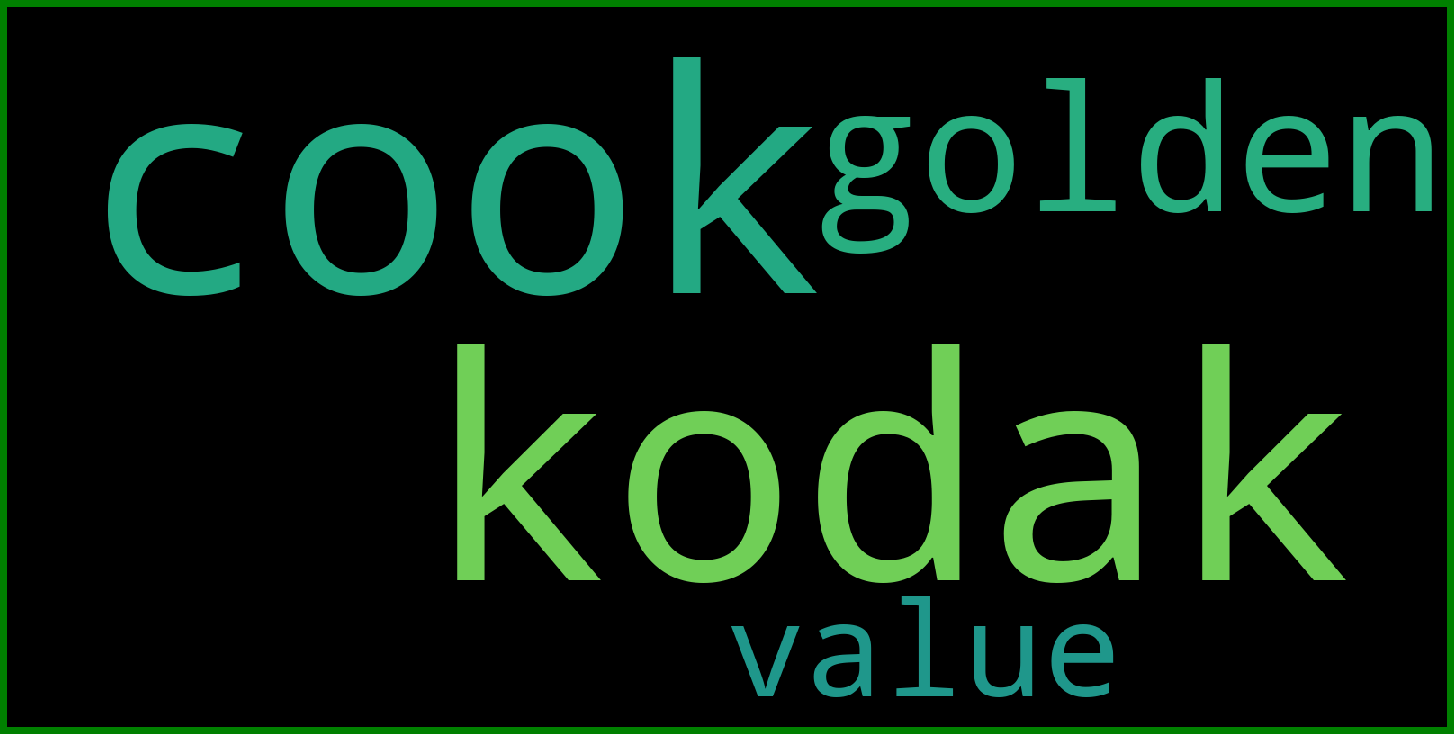

In [233]:
df = df5[["year","name"]]
m = df["name"].str.findall(" new (\w+)",flags=re.IGNORECASE)
b = df["name"].str.findall("^new (\w+)",flags=re.IGNORECASE)
r = df["name"].str.findall(" new-(\w+)",flags=re.IGNORECASE)
t = df["name"].str.findall("^new-(\w+)",flags=re.IGNORECASE)
o = df["name"].str.findall(" -new(\w+)",flags=re.IGNORECASE)
y = df["name"].str.findall("^-new(\w+)",flags=re.IGNORECASE)
k=b+m+r+t+o+y

df["second"] = k
df['second'] = df['second'].str[0]


after_new = converter(df['second'])
after_new = str(after_new).split(' ')

after_new = str(after_new)
l =  after_new.replace("nan", "")
l = str(l)
l = l.replace("\n","")
l = l.replace("num","")
l = l.replace("n0","")
l = l.replace("n1","")
l = l.replace("n2","")
l = l.replace("n3","")
l = l.replace("n4","")
l = l.replace("n5","")
l = l.replace("n6","")
l = l.replace("n7","")
l = l.replace("n8","")
l = l.replace("n9","")
l = re.sub(r'[\W_]+', ' ', l)
wordcloud = WordCloud(width=1600, height=800).generate(l)
plt.figure( figsize=(20,10), facecolor='g')
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.savefig('words following new df5.png')
plt.show()

C:\Users\eitan\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\eitan\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


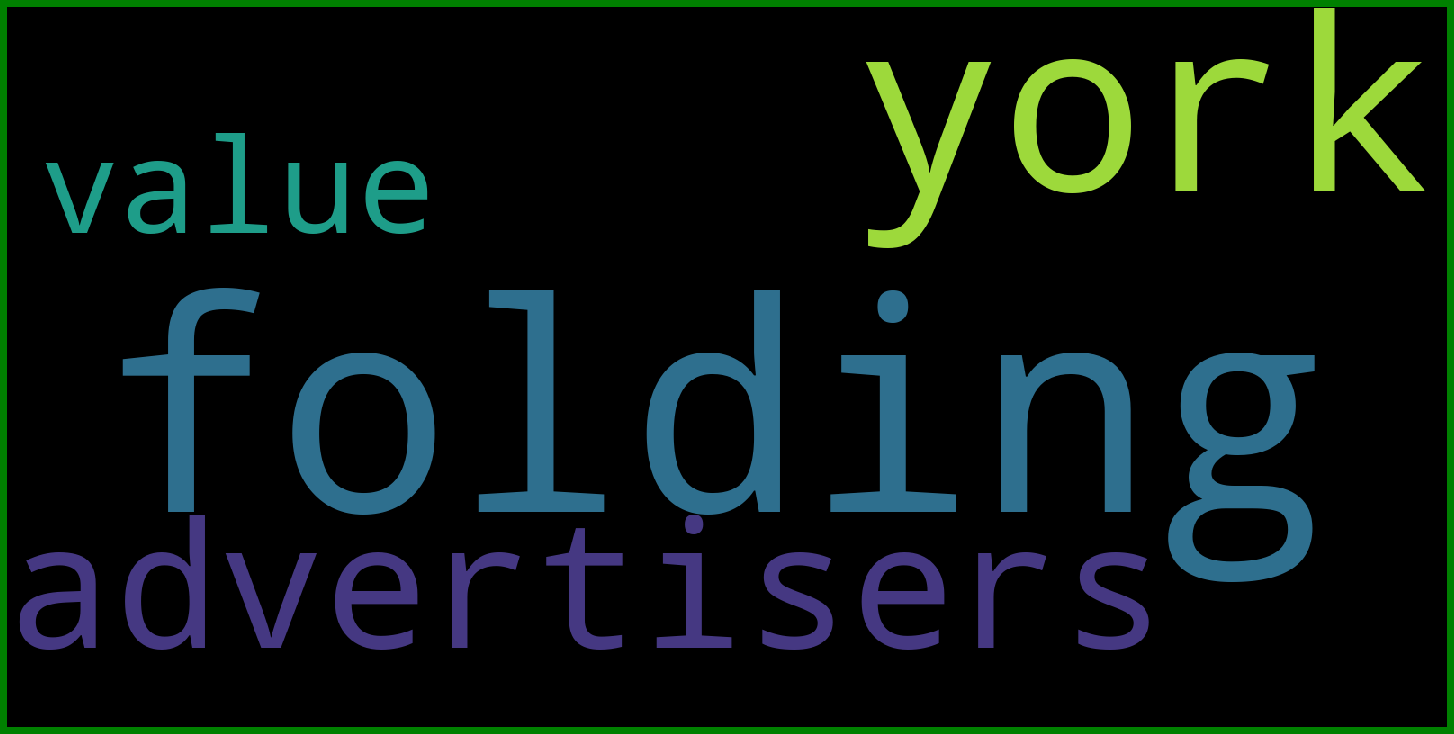

In [234]:
df = df6[["year","name"]]
m = df["name"].str.findall(" new (\w+)",flags=re.IGNORECASE)
b = df["name"].str.findall("^new (\w+)",flags=re.IGNORECASE)
r = df["name"].str.findall(" new-(\w+)",flags=re.IGNORECASE)
t = df["name"].str.findall("^new-(\w+)",flags=re.IGNORECASE)
o = df["name"].str.findall(" -new(\w+)",flags=re.IGNORECASE)
y = df["name"].str.findall("^-new(\w+)",flags=re.IGNORECASE)
k=b+m+r+t+o+y

df["second"] = k
df['second'] = df['second'].str[0]


after_new = converter(df['second'])
after_new = str(after_new).split(' ')

after_new = str(after_new)
l =  after_new.replace("nan", "")
l = str(l)
l = l.replace("\n","")
l = l.replace("num","")
l = l.replace("n0","")
l = l.replace("n1","")
l = l.replace("n2","")
l = l.replace("n3","")
l = l.replace("n4","")
l = l.replace("n5","")
l = l.replace("n6","")
l = l.replace("n7","")
l = l.replace("n8","")
l = l.replace("n9","")
l = re.sub(r'[\W_]+', ' ', l)
wordcloud = WordCloud(width=1600, height=800).generate(l)
plt.figure( figsize=(20,10), facecolor='g')
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.savefig('words following new df6.png')
plt.show()

C:\Users\eitan\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\eitan\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


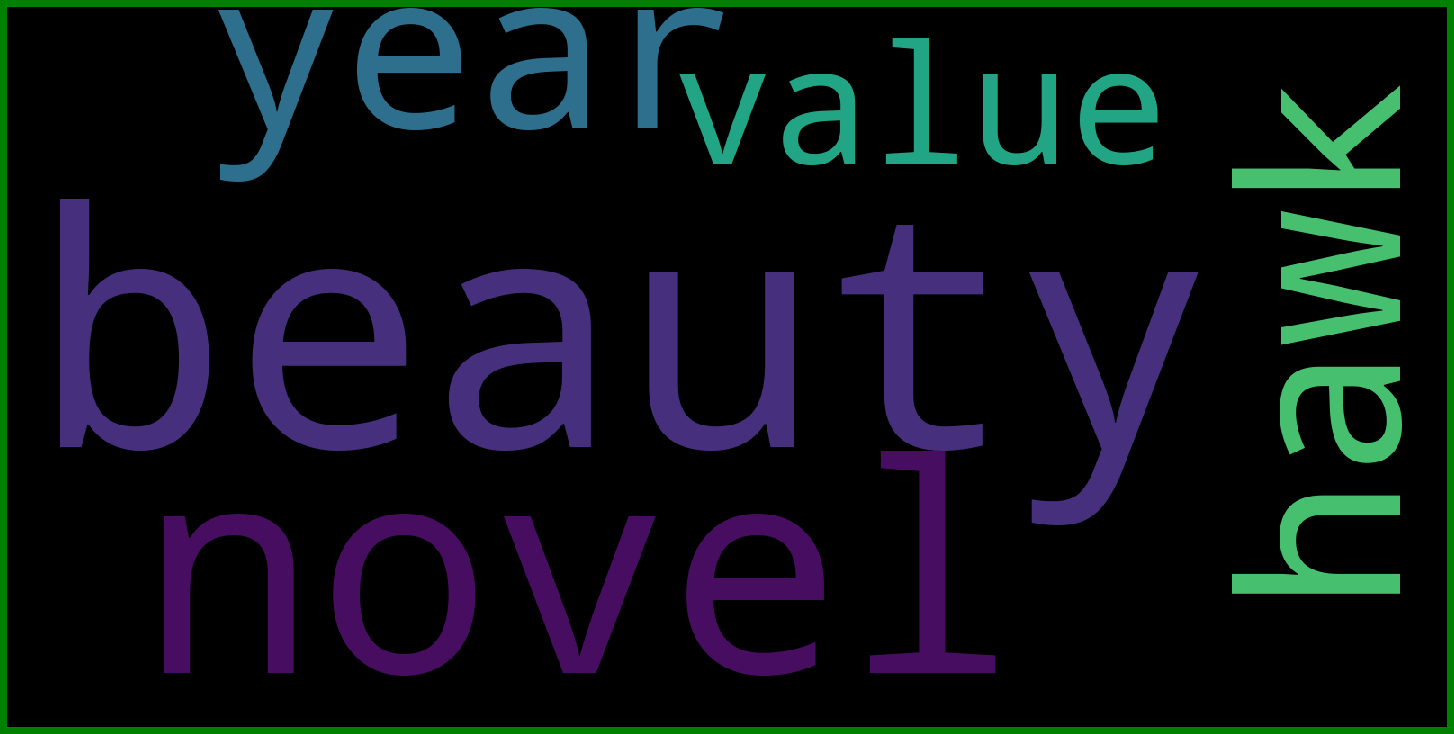

In [235]:
df = df7[["year","name"]]
m = df["name"].str.findall(" new (\w+)",flags=re.IGNORECASE)
b = df["name"].str.findall("^new (\w+)",flags=re.IGNORECASE)
r = df["name"].str.findall(" new-(\w+)",flags=re.IGNORECASE)
t = df["name"].str.findall("^new-(\w+)",flags=re.IGNORECASE)
o = df["name"].str.findall(" -new(\w+)",flags=re.IGNORECASE)
y = df["name"].str.findall("^-new(\w+)",flags=re.IGNORECASE)
k=b+m+r+t+o+y

df["second"] = k
df['second'] = df['second'].str[0]


after_new = converter(df['second'])
after_new = str(after_new).split(' ')

after_new = str(after_new)
l =  after_new.replace("nan", "")
l = str(l)
l = l.replace("\n","")
l = l.replace("num","")
l = l.replace("n0","")
l = l.replace("n1","")
l = l.replace("n2","")
l = l.replace("n3","")
l = l.replace("n4","")
l = l.replace("n5","")
l = l.replace("n6","")
l = l.replace("n7","")
l = l.replace("n8","")
l = l.replace("n9","")
l = re.sub(r'[\W_]+', ' ', l)
wordcloud = WordCloud(width=1600, height=800).generate(l)
plt.figure( figsize=(20,10), facecolor='g')
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.savefig('words following new df7.png')
plt.show()

C:\Users\eitan\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\eitan\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


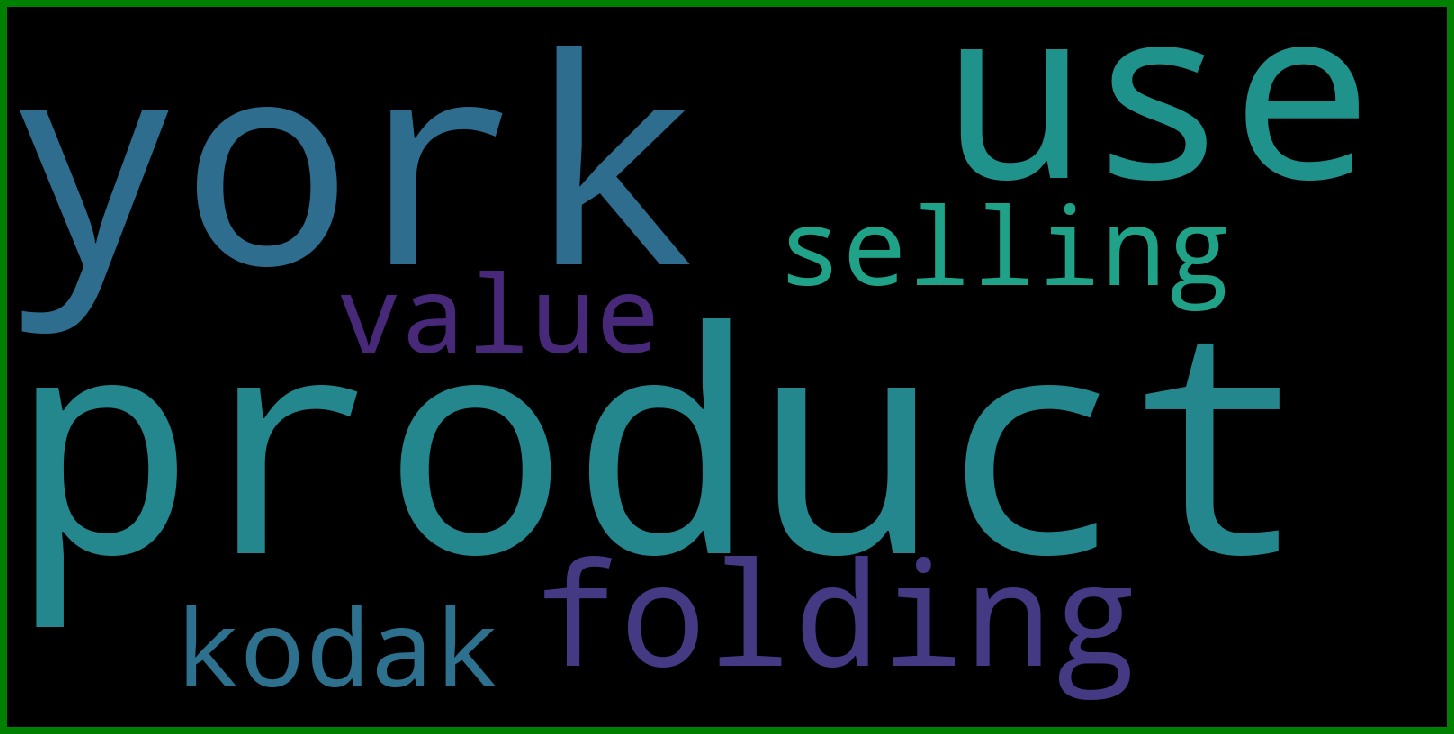

In [236]:
df = df8[["year","name"]]
m = df["name"].str.findall(" new (\w+)",flags=re.IGNORECASE)
b = df["name"].str.findall("^new (\w+)",flags=re.IGNORECASE)
r = df["name"].str.findall(" new-(\w+)",flags=re.IGNORECASE)
t = df["name"].str.findall("^new-(\w+)",flags=re.IGNORECASE)
o = df["name"].str.findall(" -new(\w+)",flags=re.IGNORECASE)
y = df["name"].str.findall("^-new(\w+)",flags=re.IGNORECASE)
k=b+m+r+t+o+y

df["second"] = k
df['second'] = df['second'].str[0]


after_new = converter(df['second'])
after_new = str(after_new).split(' ')

after_new = str(after_new)
l =  after_new.replace("nan", "")
l = str(l)
l = l.replace("\n","")
l = l.replace("num","")
l = l.replace("n0","")
l = l.replace("n1","")
l = l.replace("n2","")
l = l.replace("n3","")
l = l.replace("n4","")
l = l.replace("n5","")
l = l.replace("n6","")
l = l.replace("n7","")
l = l.replace("n8","")
l = l.replace("n9","")
l = re.sub(r'[\W_]+', ' ', l)
wordcloud = WordCloud(width=1600, height=800).generate(l)
plt.figure( figsize=(20,10), facecolor='g')
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.savefig('words following new df8.png')
plt.show()

C:\Users\eitan\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\eitan\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


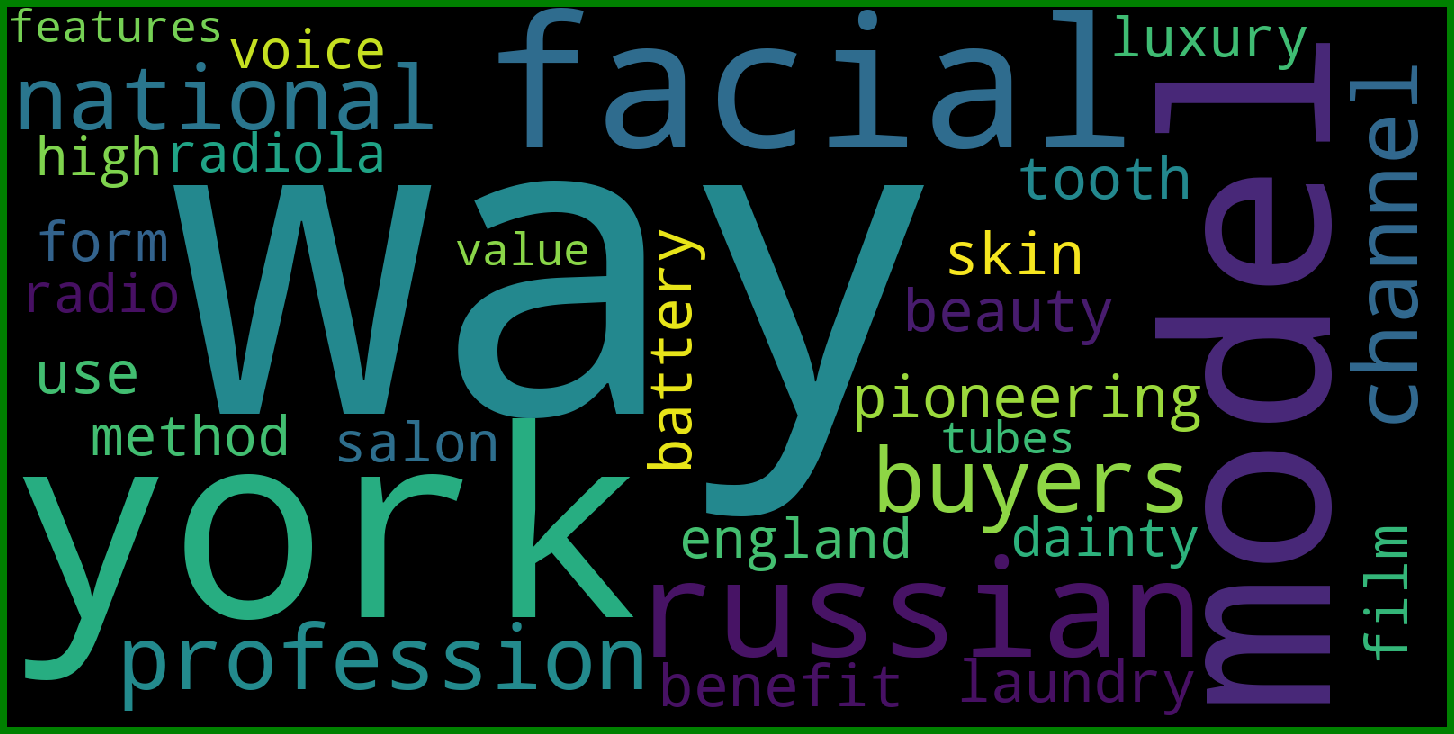

In [237]:
df = df9[["year","name"]]
m = df["name"].str.findall(" new (\w+)",flags=re.IGNORECASE)
b = df["name"].str.findall("^new (\w+)",flags=re.IGNORECASE)
r = df["name"].str.findall(" new-(\w+)",flags=re.IGNORECASE)
t = df["name"].str.findall("^new-(\w+)",flags=re.IGNORECASE)
o = df["name"].str.findall(" -new(\w+)",flags=re.IGNORECASE)
y = df["name"].str.findall("^-new(\w+)",flags=re.IGNORECASE)
k=b+m+r+t+o+y

df["second"] = k
df['second'] = df['second'].str[0]


after_new = converter(df['second'])
after_new = str(after_new).split(' ')

after_new = str(after_new)
l =  after_new.replace("nan", "")
l = str(l)
l = l.replace("\n","")
l = l.replace("num","")
l = l.replace("n0","")
l = l.replace("n1","")
l = l.replace("n2","")
l = l.replace("n3","")
l = l.replace("n4","")
l = l.replace("n5","")
l = l.replace("n6","")
l = l.replace("n7","")
l = l.replace("n8","")
l = l.replace("n9","")
l = re.sub(r'[\W_]+', ' ', l)
wordcloud = WordCloud(width=1600, height=800).generate(l)
plt.figure( figsize=(20,10), facecolor='g')
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.savefig('words following new df9.png')
plt.show()

C:\Users\eitan\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\eitan\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


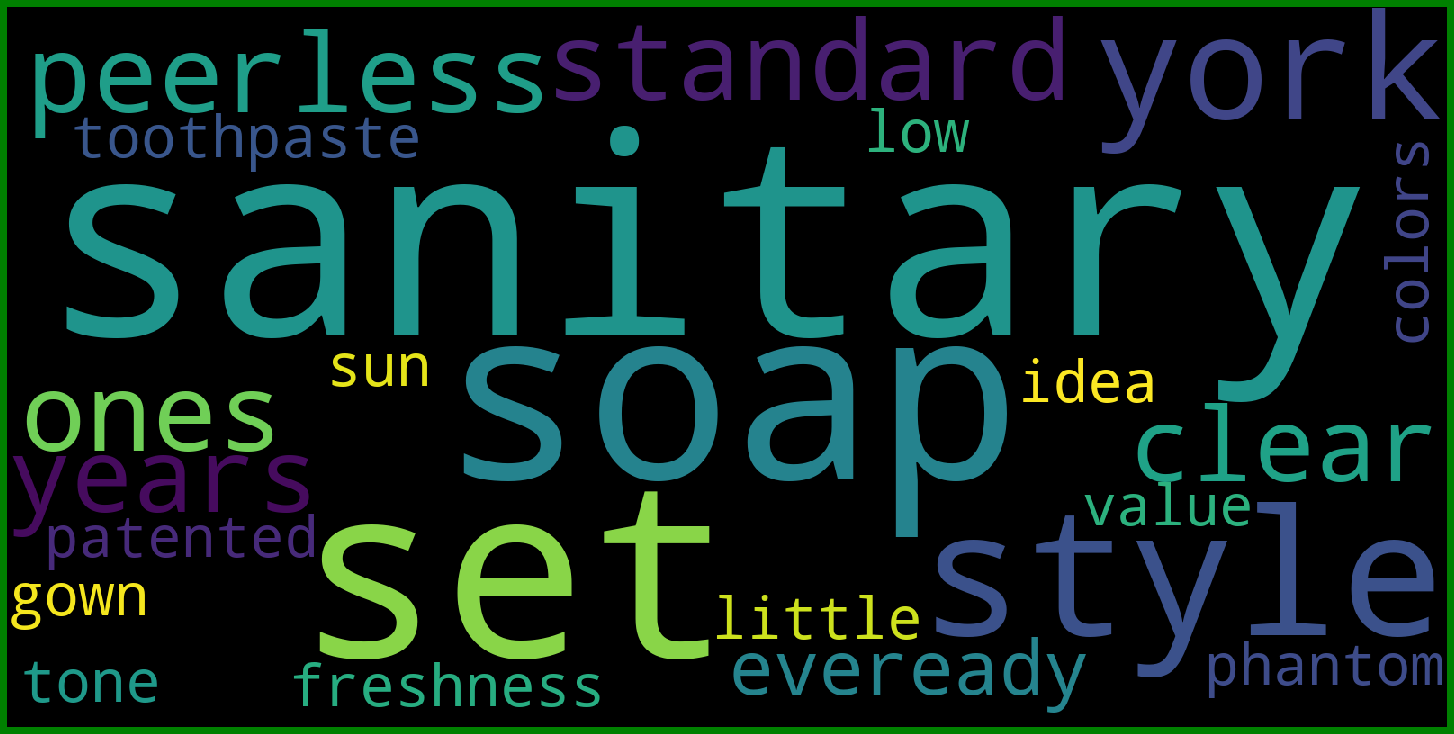

In [238]:
df = df10[["year","name"]]
m = df["name"].str.findall(" new (\w+)",flags=re.IGNORECASE)
b = df["name"].str.findall("^new (\w+)",flags=re.IGNORECASE)
r = df["name"].str.findall(" new-(\w+)",flags=re.IGNORECASE)
t = df["name"].str.findall("^new-(\w+)",flags=re.IGNORECASE)
o = df["name"].str.findall(" -new(\w+)",flags=re.IGNORECASE)
y = df["name"].str.findall("^-new(\w+)",flags=re.IGNORECASE)
k=b+m+r+t+o+y

df["second"] = k
df['second'] = df['second'].str[0]


after_new = converter(df['second'])
after_new = str(after_new).split(' ')

after_new = str(after_new)
l =  after_new.replace("nan", "")
l = str(l)
l = l.replace("\n","")
l = l.replace("num","")
l = l.replace("n0","")
l = l.replace("n1","")
l = l.replace("n2","")
l = l.replace("n3","")
l = l.replace("n4","")
l = l.replace("n5","")
l = l.replace("n6","")
l = l.replace("n7","")
l = l.replace("n8","")
l = l.replace("n9","")
l = re.sub(r'[\W_]+', ' ', l)
wordcloud = WordCloud(width=1600, height=800).generate(l)
plt.figure( figsize=(20,10), facecolor='g')
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.savefig('words following new df10.png')
plt.show()

C:\Users\eitan\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\eitan\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


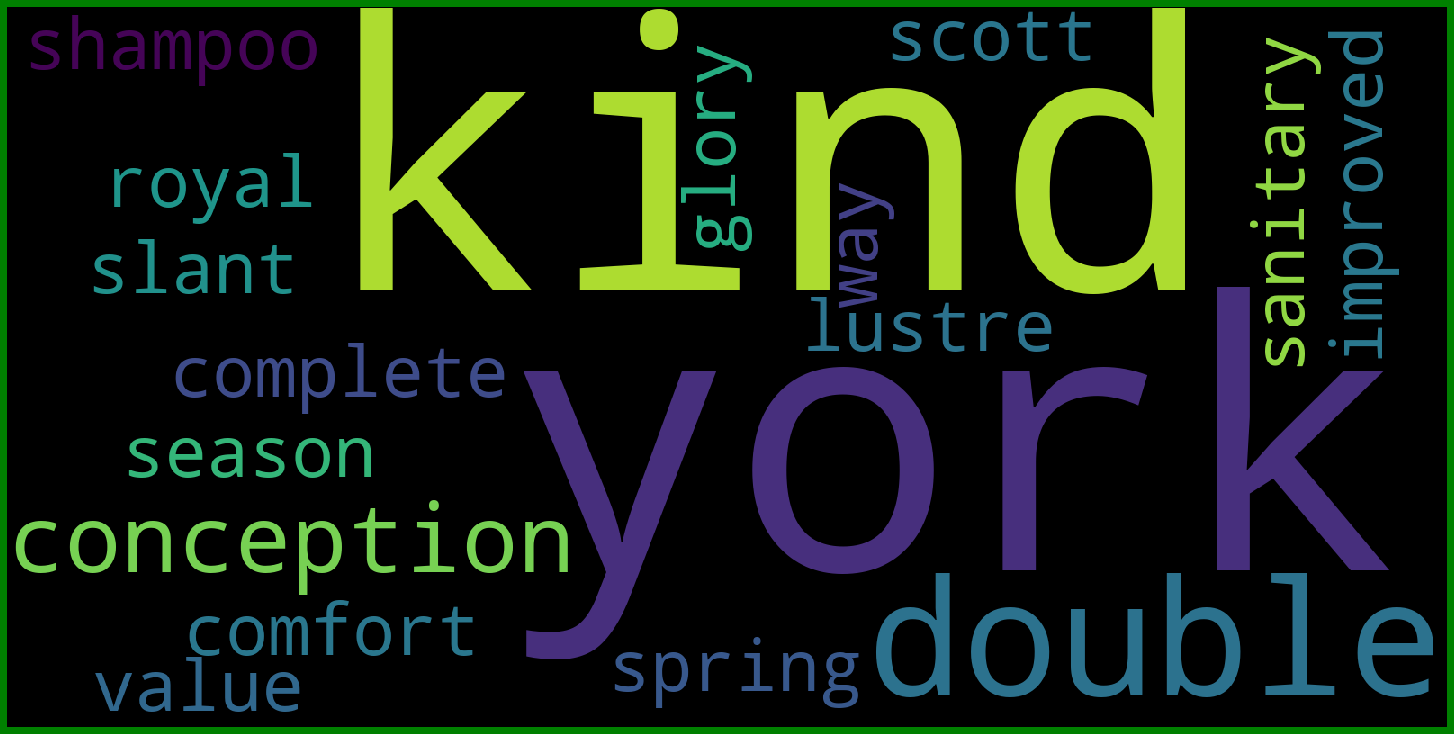

In [239]:
df = df11[["year","name"]]
m = df["name"].str.findall(" new (\w+)",flags=re.IGNORECASE)
b = df["name"].str.findall("^new (\w+)",flags=re.IGNORECASE)
r = df["name"].str.findall(" new-(\w+)",flags=re.IGNORECASE)
t = df["name"].str.findall("^new-(\w+)",flags=re.IGNORECASE)
o = df["name"].str.findall(" -new(\w+)",flags=re.IGNORECASE)
y = df["name"].str.findall("^-new(\w+)",flags=re.IGNORECASE)
k=b+m+r+t+o+y

df["second"] = k
df['second'] = df['second'].str[0]


after_new = converter(df['second'])
after_new = str(after_new).split(' ')

after_new = str(after_new)
l =  after_new.replace("nan", "")
l = str(l)
l = l.replace("\n","")
l = l.replace("num","")
l = l.replace("n0","")
l = l.replace("n1","")
l = l.replace("n2","")
l = l.replace("n3","")
l = l.replace("n4","")
l = l.replace("n5","")
l = l.replace("n6","")
l = l.replace("n7","")
l = l.replace("n8","")
l = l.replace("n9","")
l = re.sub(r'[\W_]+', ' ', l)
wordcloud = WordCloud(width=1600, height=800).generate(l)
plt.figure( figsize=(20,10), facecolor='g')
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.savefig('words following new df11.png')
plt.show()

C:\Users\eitan\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\eitan\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


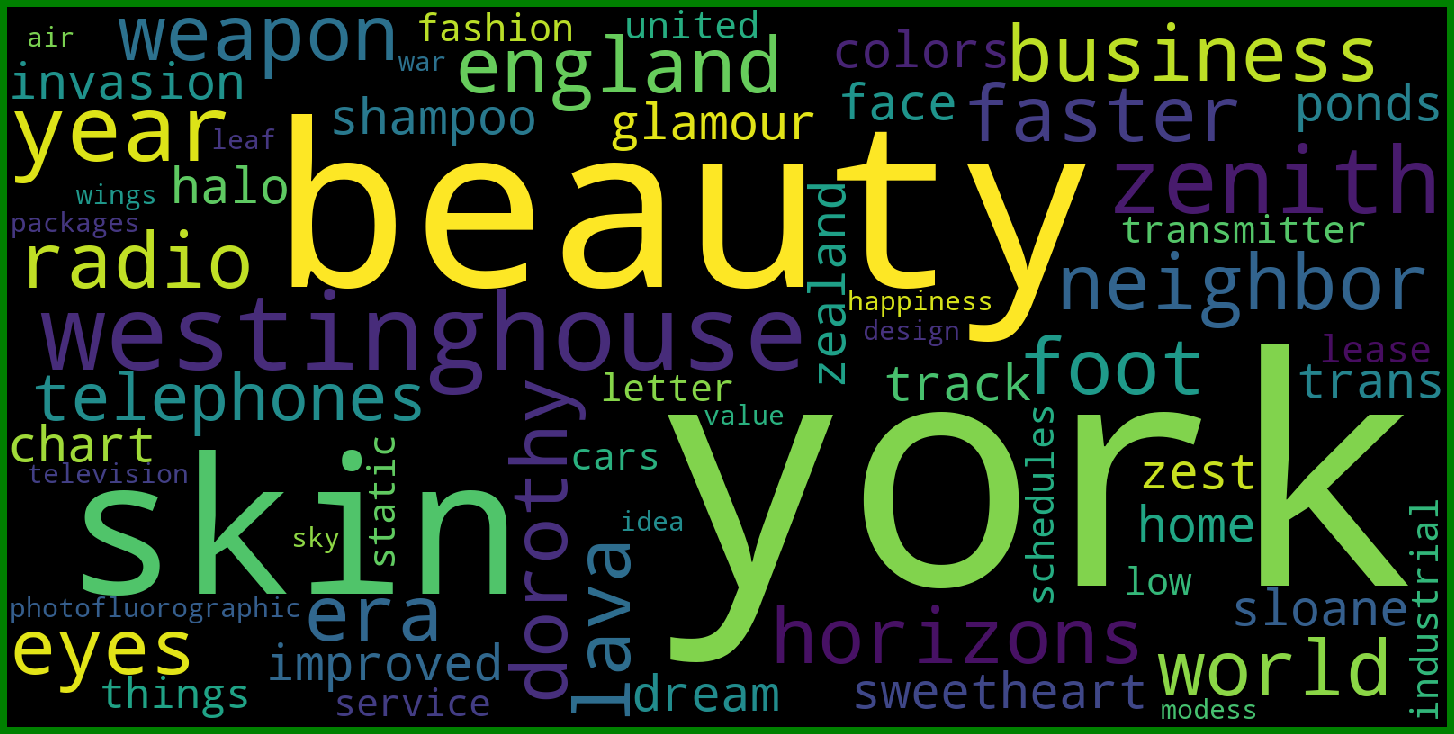

In [240]:
df = df12[["year","name"]]
m = df["name"].str.findall(" new (\w+)",flags=re.IGNORECASE)
b = df["name"].str.findall("^new (\w+)",flags=re.IGNORECASE)
r = df["name"].str.findall(" new-(\w+)",flags=re.IGNORECASE)
t = df["name"].str.findall("^new-(\w+)",flags=re.IGNORECASE)
o = df["name"].str.findall(" -new(\w+)",flags=re.IGNORECASE)
y = df["name"].str.findall("^-new(\w+)",flags=re.IGNORECASE)
k=b+m+r+t+o+y

df["second"] = k
df['second'] = df['second'].str[0]


after_new = converter(df['second'])
after_new = str(after_new).split(' ')

after_new = str(after_new)
l =  after_new.replace("nan", "")
l = str(l)
l = l.replace("\n","")
l = l.replace("num","")
l = l.replace("n0","")
l = l.replace("n1","")
l = l.replace("n2","")
l = l.replace("n3","")
l = l.replace("n4","")
l = l.replace("n5","")
l = l.replace("n6","")
l = l.replace("n7","")
l = l.replace("n8","")
l = l.replace("n9","")
l = re.sub(r'[\W_]+', ' ', l)
wordcloud = WordCloud(width=1600, height=800).generate(l)
plt.figure( figsize=(20,10), facecolor='g')
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.savefig('words following new df12.png')
plt.show()

C:\Users\eitan\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\eitan\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


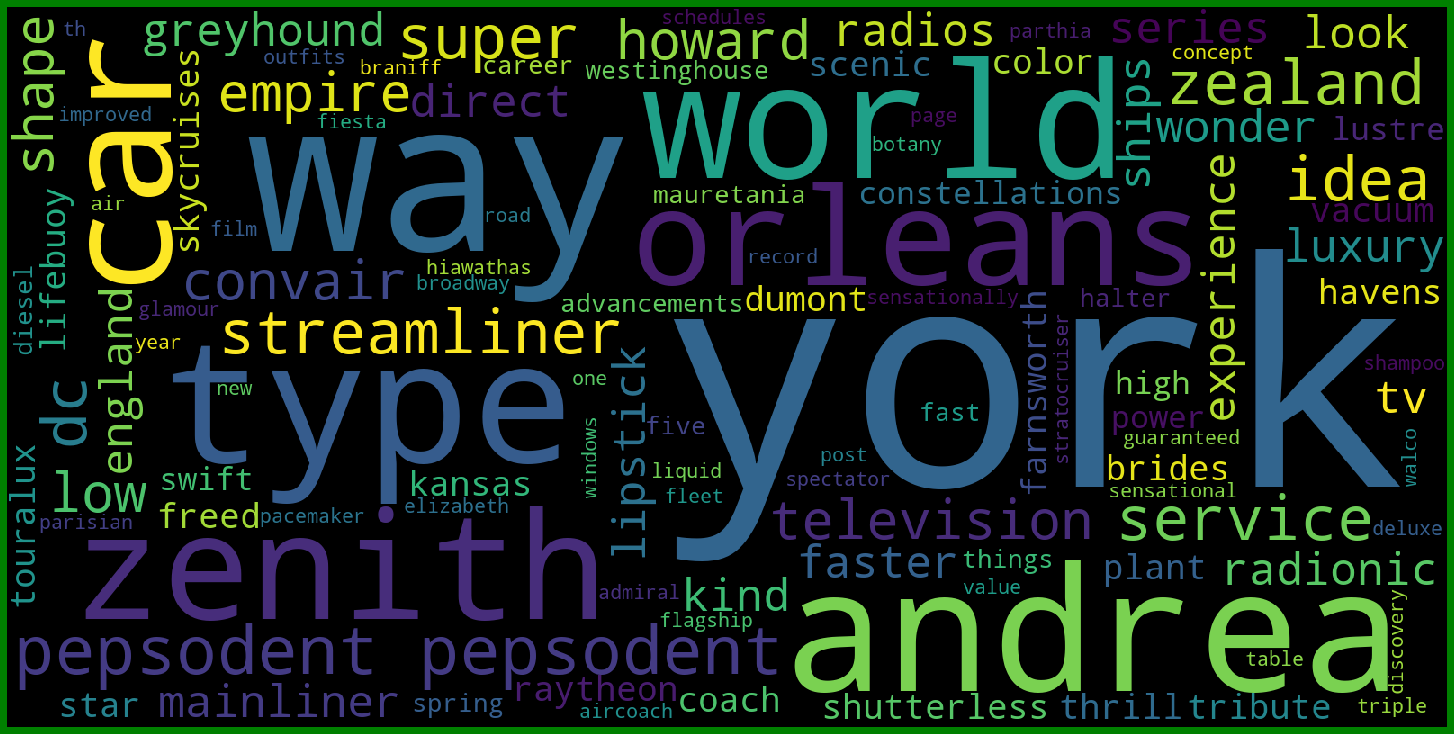

In [241]:
df = df13[["year","name"]]
m = df["name"].str.findall(" new (\w+)",flags=re.IGNORECASE)
b = df["name"].str.findall("^new (\w+)",flags=re.IGNORECASE)
r = df["name"].str.findall(" new-(\w+)",flags=re.IGNORECASE)
t = df["name"].str.findall("^new-(\w+)",flags=re.IGNORECASE)
o = df["name"].str.findall(" -new(\w+)",flags=re.IGNORECASE)
y = df["name"].str.findall("^-new(\w+)",flags=re.IGNORECASE)
k=b+m+r+t+o+y

df["second"] = k
df['second'] = df['second'].str[0]


after_new = converter(df['second'])
after_new = str(after_new).split(' ')

after_new = str(after_new)
l =  after_new.replace("nan", "")
l = str(l)
l = l.replace("\n","")
l = l.replace("num","")
l = l.replace("n0","")
l = l.replace("n1","")
l = l.replace("n2","")
l = l.replace("n3","")
l = l.replace("n4","")
l = l.replace("n5","")
l = l.replace("n6","")
l = l.replace("n7","")
l = l.replace("n8","")
l = l.replace("n9","")
l = re.sub(r'[\W_]+', ' ', l)
wordcloud = WordCloud(width=1600, height=800).generate(l)
plt.figure( figsize=(20,10), facecolor='g')
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.savefig('words following new df13.png')
plt.show()

C:\Users\eitan\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\eitan\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


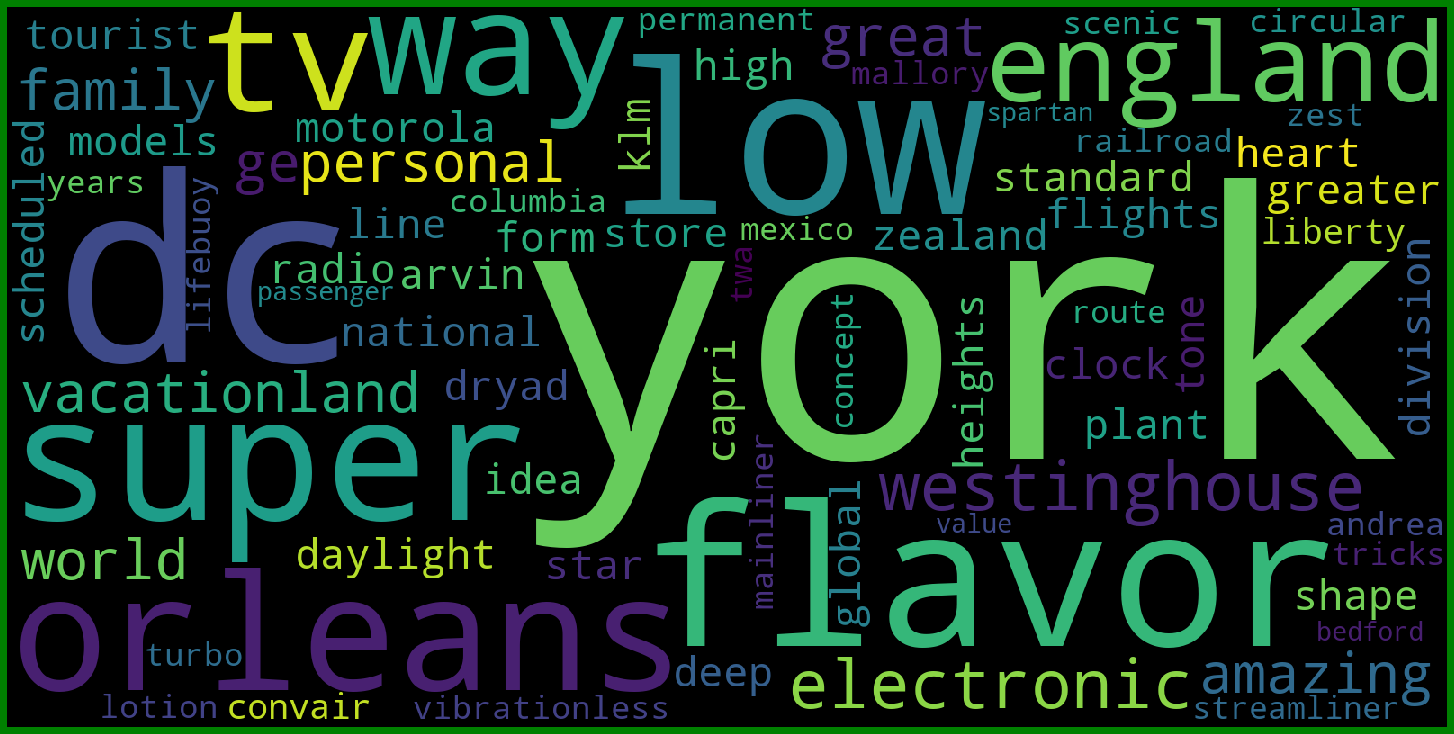

In [242]:
df = df14[["year","name"]]
m = df["name"].str.findall(" new (\w+)",flags=re.IGNORECASE)
b = df["name"].str.findall("^new (\w+)",flags=re.IGNORECASE)
r = df["name"].str.findall(" new-(\w+)",flags=re.IGNORECASE)
t = df["name"].str.findall("^new-(\w+)",flags=re.IGNORECASE)
o = df["name"].str.findall(" -new(\w+)",flags=re.IGNORECASE)
y = df["name"].str.findall("^-new(\w+)",flags=re.IGNORECASE)
k=b+m+r+t+o+y

df["second"] = k
df['second'] = df['second'].str[0]


after_new = converter(df['second'])
after_new = str(after_new).split(' ')

after_new = str(after_new)
l =  after_new.replace("nan", "")
l = str(l)
l = l.replace("\n","")
l = l.replace("num","")
l = l.replace("n0","")
l = l.replace("n1","")
l = l.replace("n2","")
l = l.replace("n3","")
l = l.replace("n4","")
l = l.replace("n5","")
l = l.replace("n6","")
l = l.replace("n7","")
l = l.replace("n8","")
l = l.replace("n9","")
l = re.sub(r'[\W_]+', ' ', l)
wordcloud = WordCloud(width=1600, height=800).generate(l)
plt.figure( figsize=(20,10), facecolor='g')
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.savefig('words following new df14.png')
plt.show()